# EDA-Home Credit

- Reading dataset
- Missing value analysis
- Transformation of dates 
- Univariate Analysis
- Analysing numerical columns
- Outliers
- Bivariate analysis

### Import the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

## Reading training data

In [3]:
application_train = pd.read_csv('application_train.csv')
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [13]:
train_missing = application_train.count()/len(application_train)
train_missing = (1-train_missing)*100
train_missing.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [14]:
train = application_train.loc[:, train_missing<50]

## Missing value treatment

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or more than 50%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 50% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns. 

In [5]:
# OCCUPATION_TYPE                 31.345545
# EXT_SOURCE_3                    19.825307
# AMT_REQ_CREDIT_BUREAU_QRT       13.501631
# AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
# AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
# AMT_REQ_CREDIT_BUREAU_MON       13.501631
# AMT_REQ_CREDIT_BUREAU_DAY       13.501631
# AMT_REQ_CREDIT_BUREAU_HOUR      13.501631

Let's analylize these columns one by one

### Column: OCCUPATION_TYPE

As you can see, OCCUPATION_TYPE column has 31% missing data, which is also a huge number. So, it would be approprite to remove this column, but if you go through this column, this seems to look important. So, we will not analyse this column. 

In [6]:
train['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

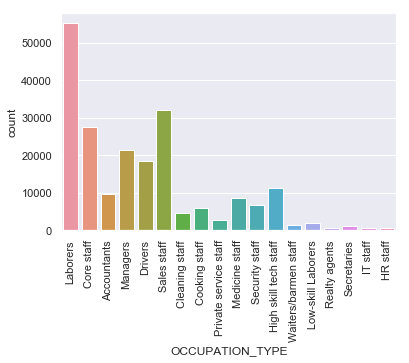

In [7]:
#application_train['OCCUPATION_TYPE'].count.plot.hist()
sns.countplot(x= 'OCCUPATION_TYPE', data = train)
plt.xticks(rotation=90)

As you can see that this column has considerable perentage of missing values, that is 31%. Since it is a categorrical column, we can only replace it with mode value. But, replacing all of these 31% missing values with "Laborers" class will not be fair. So, we will leave it as it is and will not do any missing value treatment here. 

### Column: EXT_SOURCE_3

In [8]:
train['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

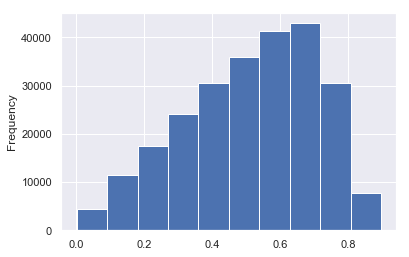

In [9]:
# Plotting the distribution
train['EXT_SOURCE_3'].plot.hist()

In [10]:
train['EXT_SOURCE_3'].mean()

0.5108529061800121

In [11]:
train['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

This data is a skewed normal distribution

### Column: AMT_REQ_CREDIT_BUREAU_QRT

In [32]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

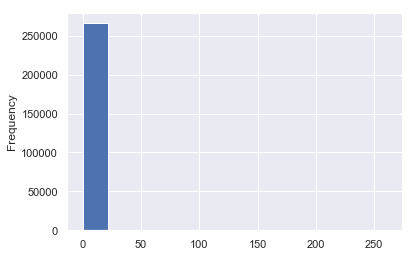

In [14]:
#application_train['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_QRT.unique())
train['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = num_unique_values)

In [15]:
train.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [16]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [17]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
dtype: float64

Since the column only takes discrete values, 1 or 0, so we cannot replace it by mean value. Here, we will replace it by mode. 

### Column: AMT_REQ_CREDIT_BUREAU_YEAR

In [18]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].head(10)

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    2.0
7    0.0
8    1.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

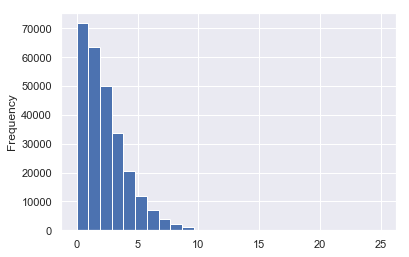

In [19]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
train['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = num_unique_values)

As you can see that the values are only integers, either 0,1,2 or something else. If we will replace, we will replace by mode value and not mean value because median value will give an decimal value. 

In [20]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [21]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
dtype: float64

### Column: AMT_REQ_CREDIT_BUREAU_WEEK

In [22]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

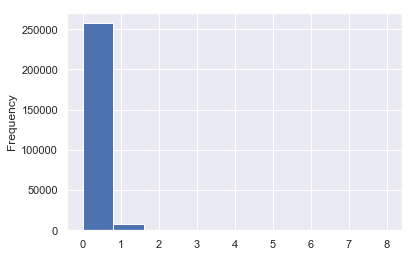

In [23]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_WEEK.unique())
train['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins = num_unique_values)

As you can see, mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. So, we can ignore this column for analysis. 

### Column: AMT_REQ_CREDIT_BUREAU_MON

In [24]:
train['AMT_REQ_CREDIT_BUREAU_MON'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

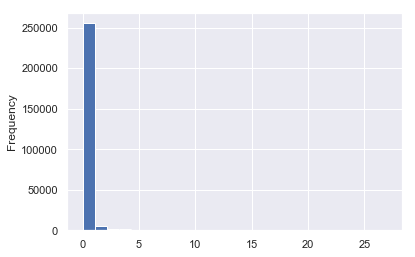

In [25]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_MON.unique())
train['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins = num_unique_values)

Again the same observation that mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. So, we can ignore this column. 

### Column: AMT_REQ_CREDIT_BUREAU_DAY

In [26]:
train['AMT_REQ_CREDIT_BUREAU_DAY'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

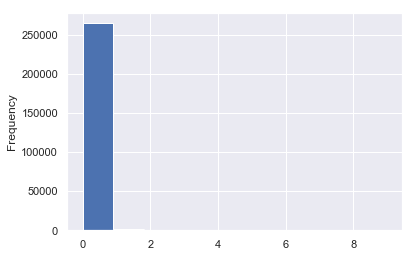

In [27]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_DAY.unique())
train['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins = num_unique_values)

In [28]:
train.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

As you can see, all the values are 0's. So, we can ignore this column. 

### Column: AMT_REQ_CREDIT_BUREAU_HOUR

In [29]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

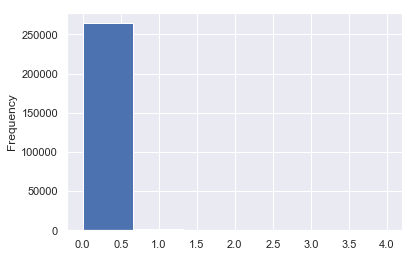

In [30]:
num_unique_values =  len(train.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
train['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins = num_unique_values)

In [31]:
train.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

Again, we can ignore this column.

In [32]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG',

### Column: DAYS_BIRTH

This column has represents the clients birth in number of days relative to the application. So, we are converting into year for conciseness and better understanding. As the days are given as negative values, we have used -round() to convert it into positive values. We will do the same transformation for other dates. 

In [33]:
train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [34]:
train['DAYS_BIRTH'] = -round(train['DAYS_BIRTH']/365, 0)
train['DAYS_BIRTH'].head()

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [34]:
train['DAYS_REGISTRATION'] = -round(train['DAYS_REGISTRATION']/365, 0)
train['DAYS_REGISTRATION'].head()

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [35]:
train['DAYS_ID_PUBLISH'] = -round(train['DAYS_ID_PUBLISH']/365, 0)
train['DAYS_ID_PUBLISH'].head()

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [37]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                    float64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH               float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL  

### Target

### Total users

In [38]:
train['TARGET'].count()

307511

### Client with payment difficulties

In [39]:
(train['TARGET']==1).sum()

24825

### Other clients

In [40]:
(train['TARGET']==0).sum()

282686

### Ratio
Too much data imbalance

In [41]:
(train['TARGET']==0).sum()/(train['TARGET']==1).sum()

11.387150050352467

## Now, we will analyse numerical and categorical data. Let's start with categorical data. 


### Analysing categorical data
Since due to data imbalance, we will separate out the train with a target equal to 0 and train with a target equal to 1. And we will analyse them individually and try to find any relationship if it exists. 

In [42]:
train_0 = train.loc[train['TARGET'] == 0]
train_1 = train.loc[train['TARGET'] == 1]

Here, we have used 3 different plots for analysis
- Pie plot: For plotting the all the values present in a column in terms of percentage. So, the sum of those data types will be 100. 
- Countplot 1: Here, plotted the count of the different categories. So, Target=0 will have higher count than Target=1. 
- Countplot 2: To plot this dataset, we have first divided the dataset into 2 subsets, Target=0 and Target=1. Then again divided the individual Target=0 and Target=1 into different categories. Then, plotted these categories in terms of percentage. So, you can find that the values for Target=0 and Target=1 are mostly equal. Please go through the code of this plot to understand for further doubts. 

In [43]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [44]:
train_categorical = train.select_dtypes(include=['object']).columns

# Univariate Analysis of the Categorical data

### Plotting the data.
Ex: For column "NAME_CONTRACT_TYPE", in the first plot, 90% 'cash_loans' are there and 10% 'Revolving_loans' are there. In the second plot, the numnber of 'cash_loans' is ~250,000 and ~2500 for 'cash_loans' for Target=0. Similarly for Target=1. In the last plot, since we have plotted the dataset in terms of percentage, so, sum of 'blue' colour for 'cash_loans' and 'Revolving_loans' for Target=0 is 1. Similarly, sum of orange' colour for 'cash_loans' and 'Revolving_loans' for Target=1 is 1.

Plotting  NAME_CONTRACT_TYPE


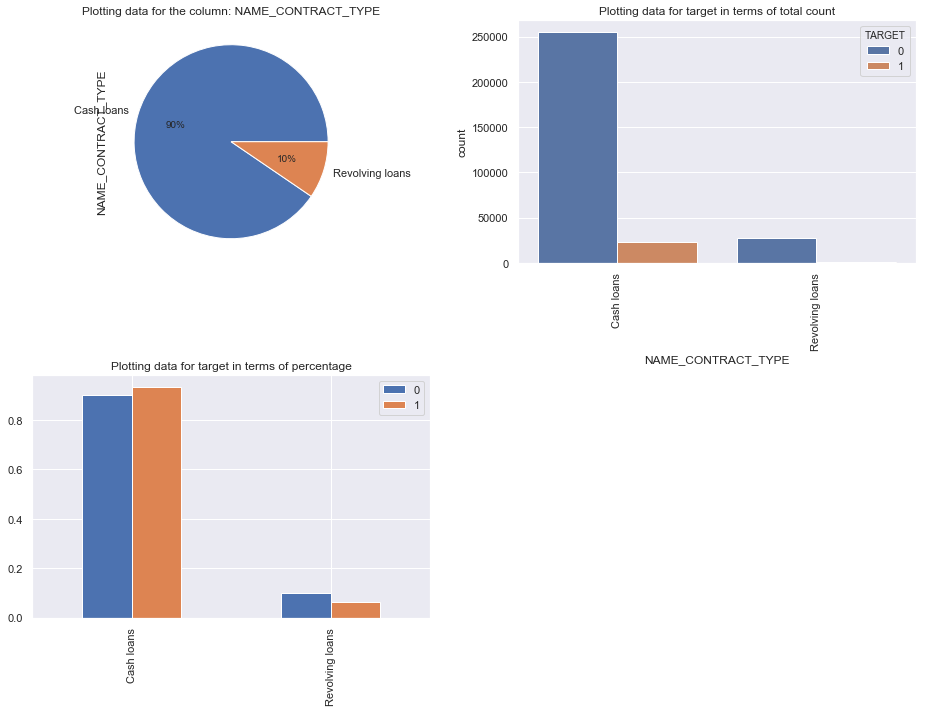

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


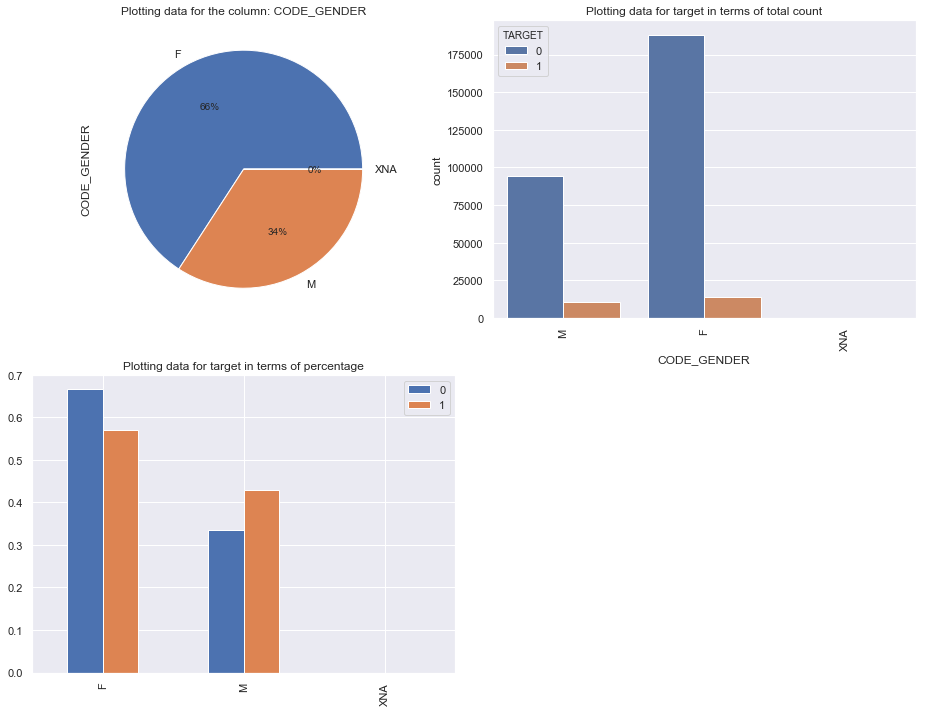

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


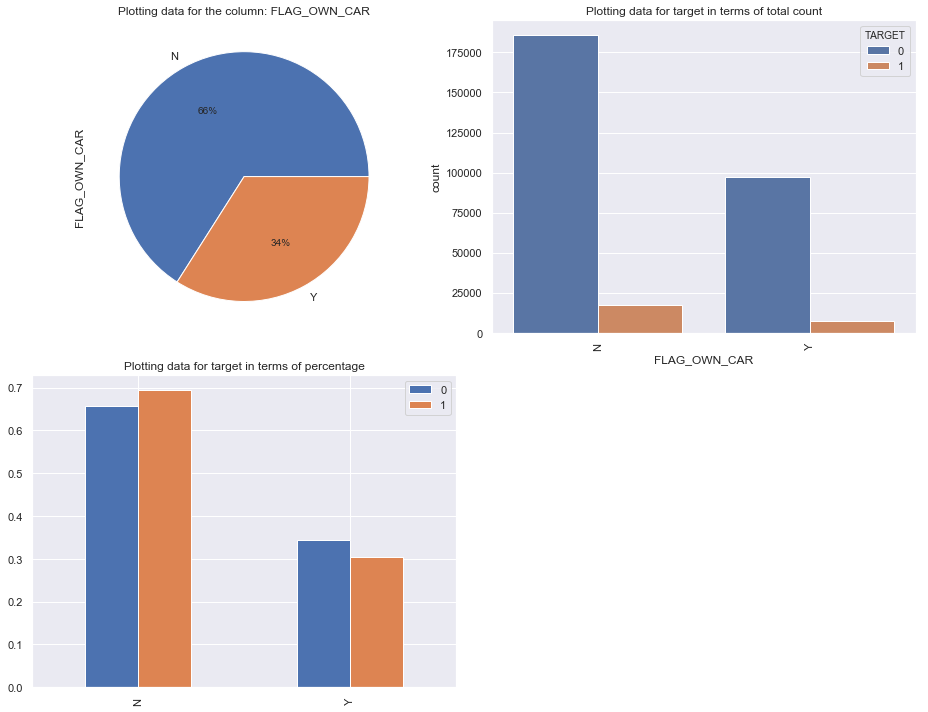

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


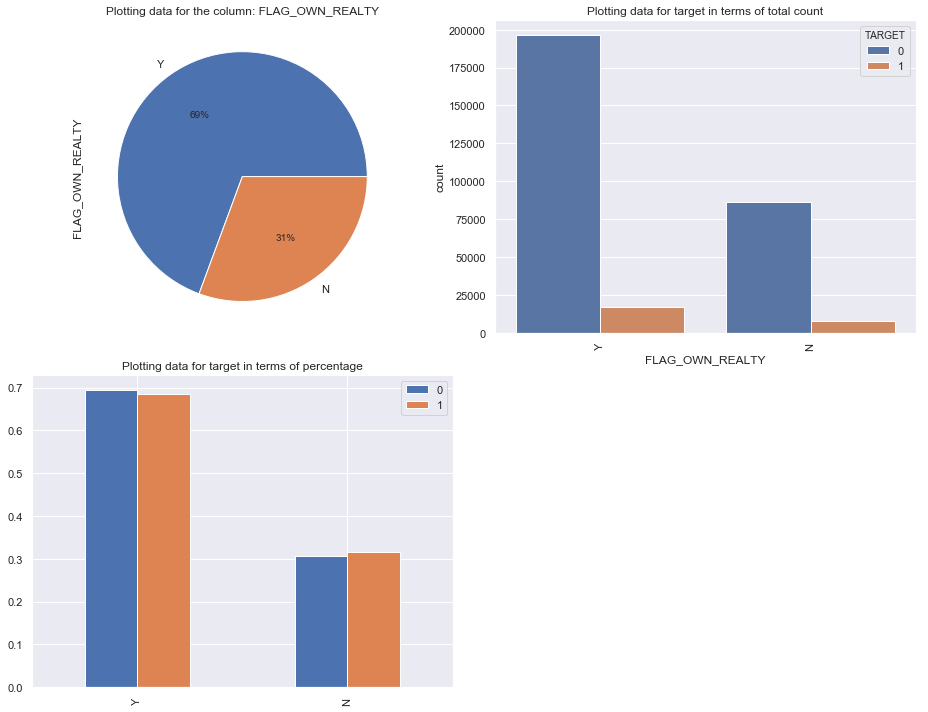

----------------------------------------------------------------------------------------------
Plotting  NAME_TYPE_SUITE


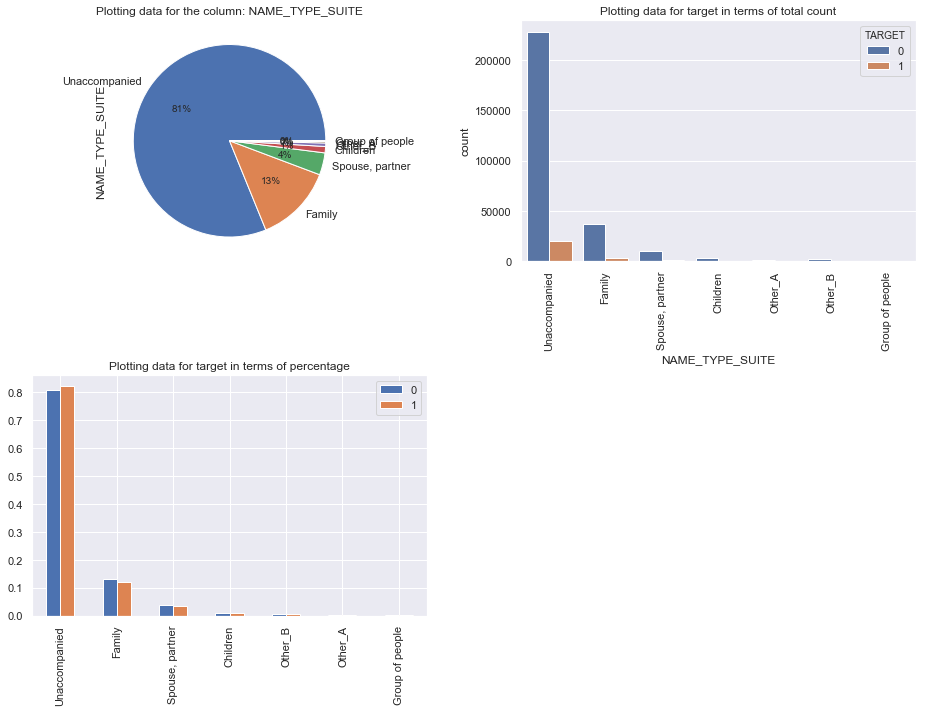

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


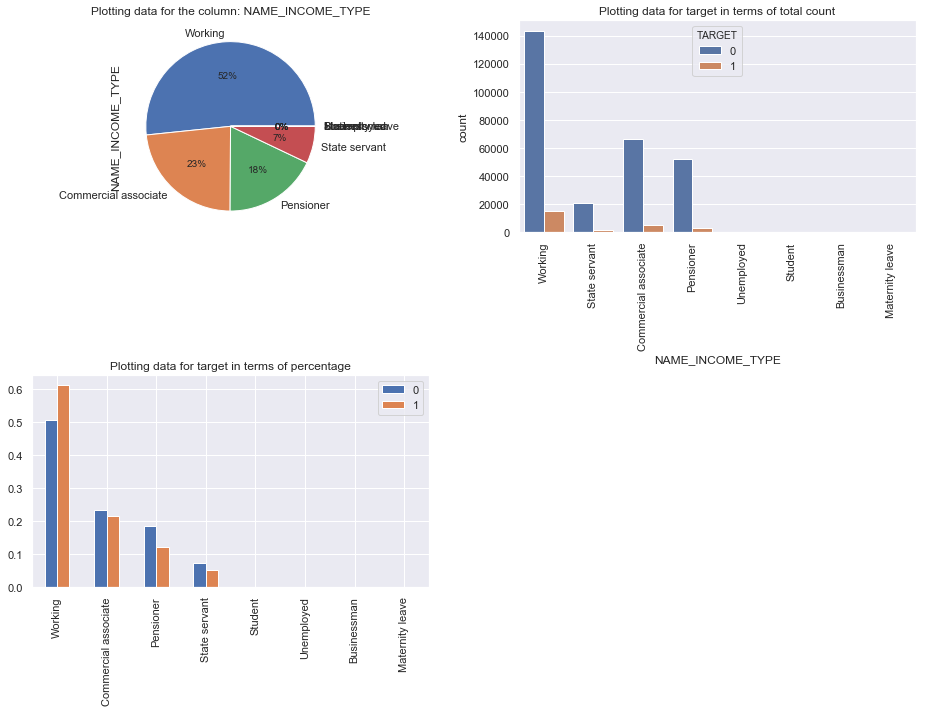

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


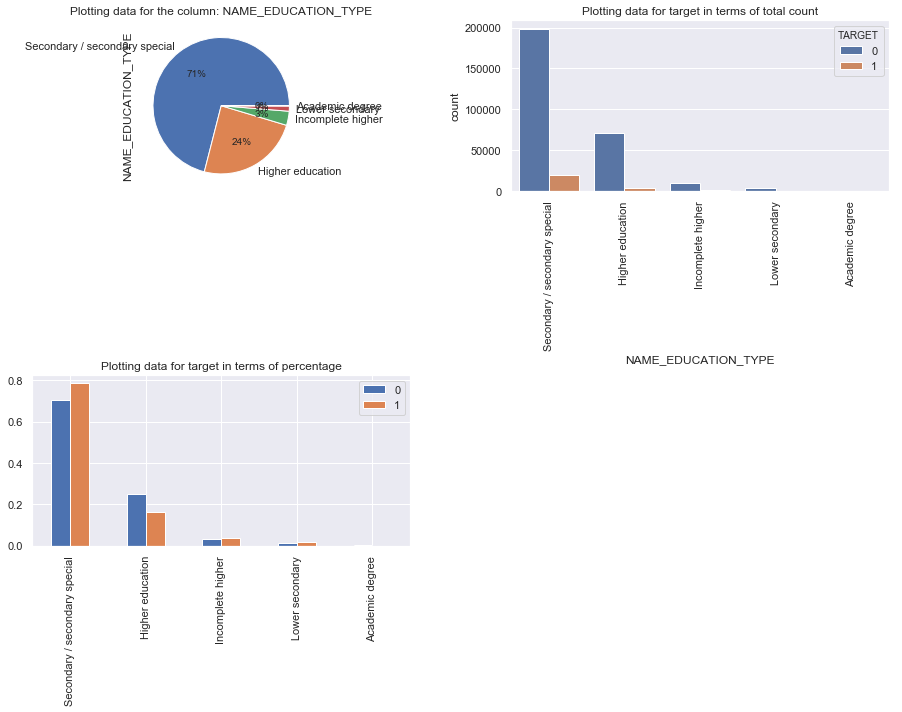

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


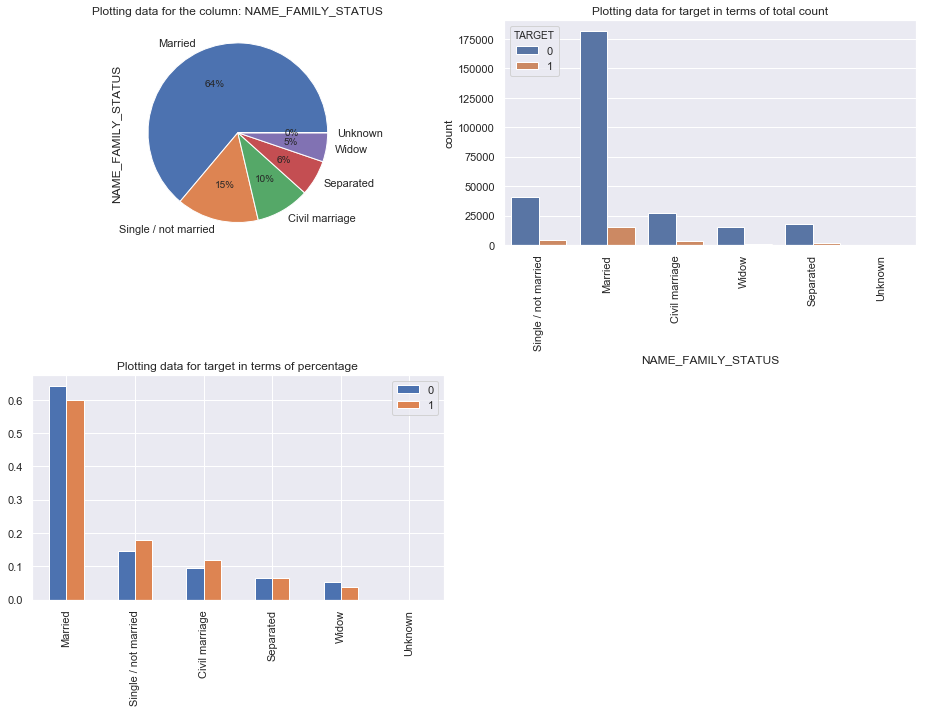

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


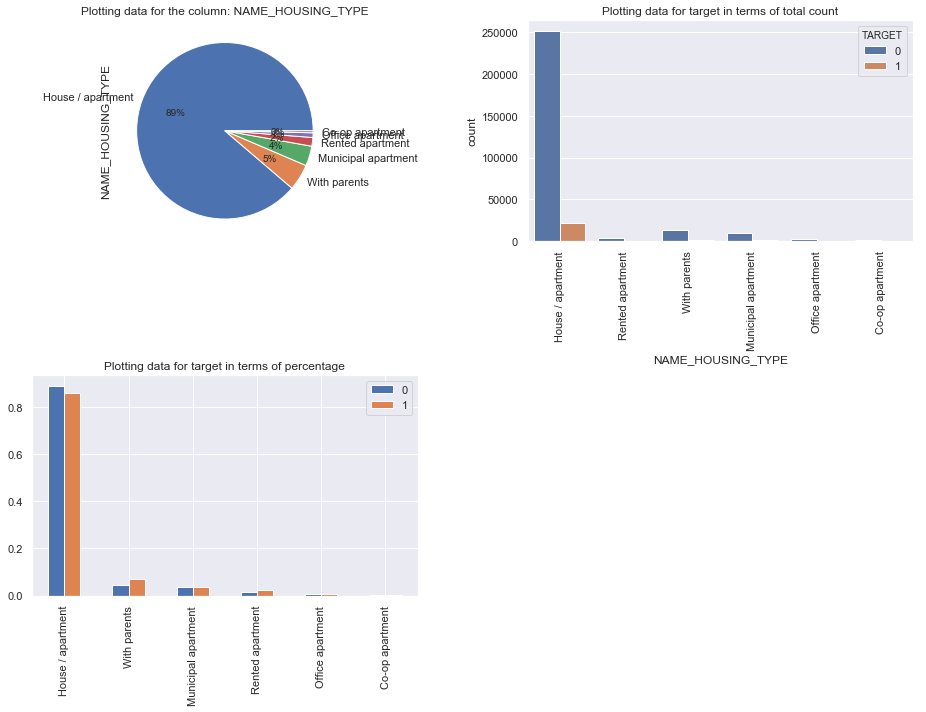

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


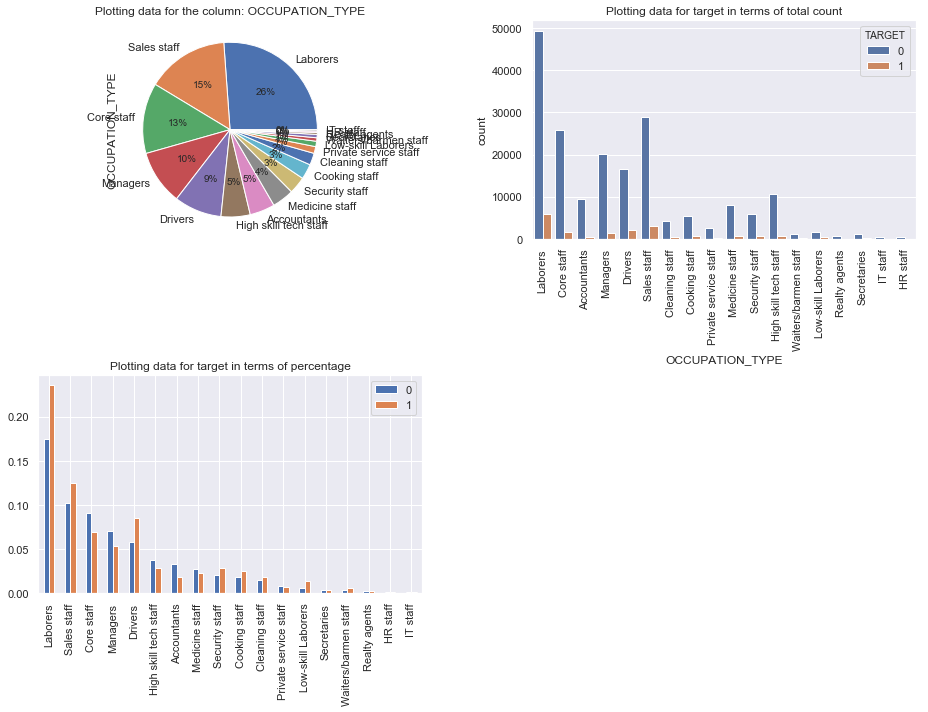

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


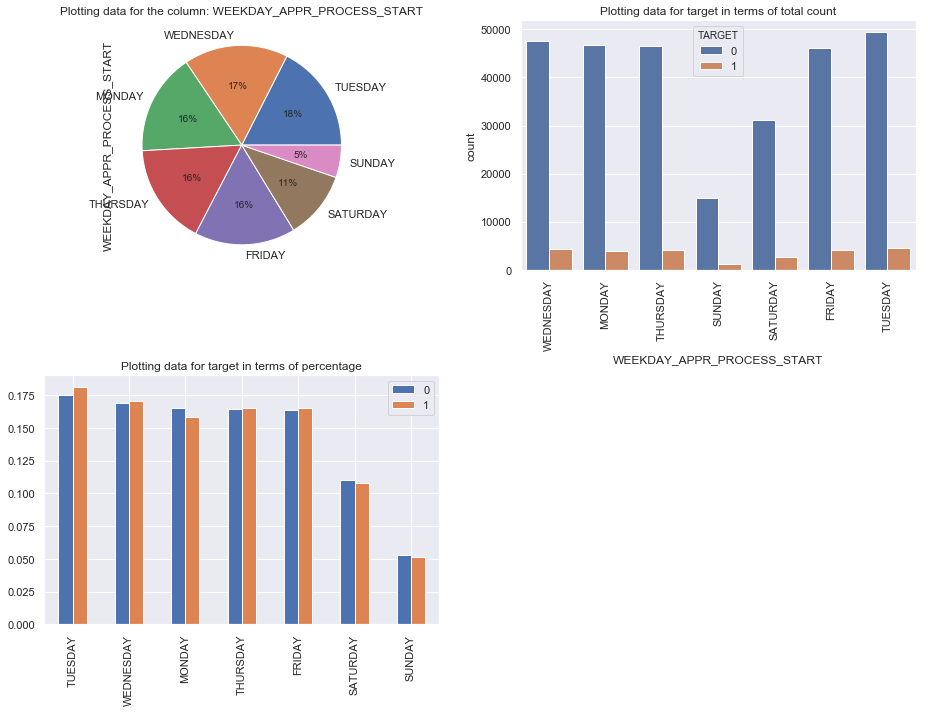

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


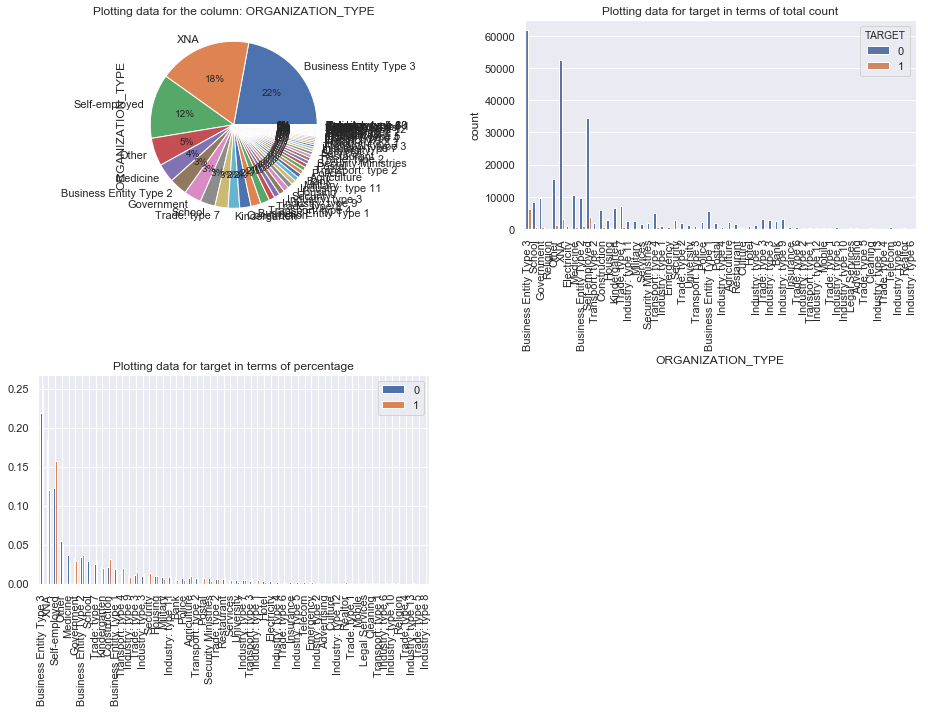

----------------------------------------------------------------------------------------------
Plotting  EMERGENCYSTATE_MODE


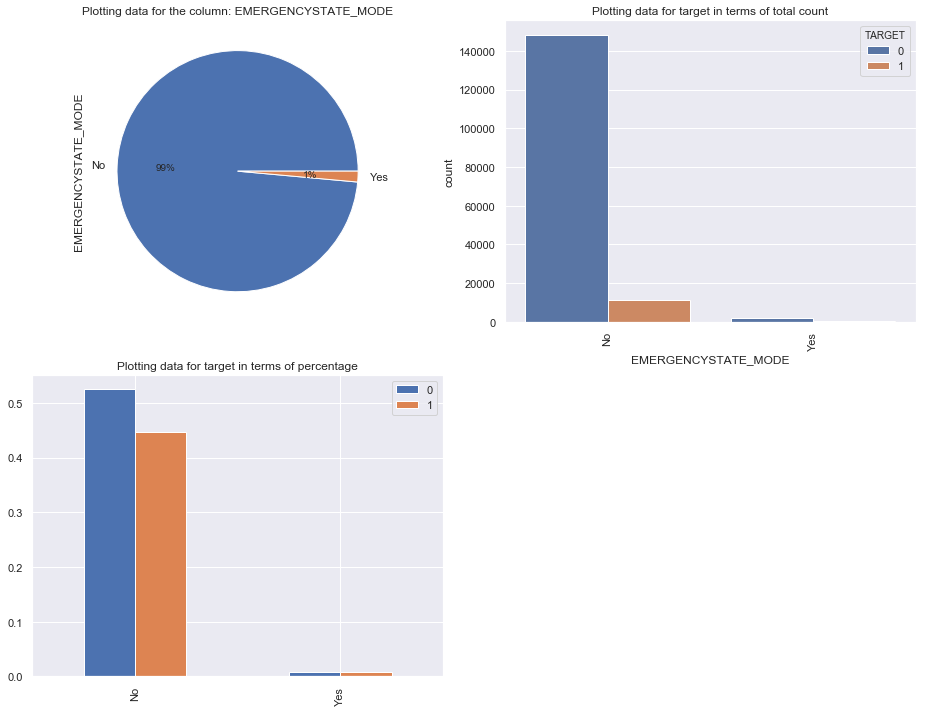

----------------------------------------------------------------------------------------------


In [45]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(train, train_0, train_1, column)
    print('----------------------------------------------------------------------------------------------')

The variable which seems to be important are:
- CODE_GENDER: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).
- NAME_INCOME_TYPE: Pensioner defaulter is lower than non-defaulter.
- NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low. 
- NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.
- OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible. 
    

# Numerical columns

### Non-defaulter correlation

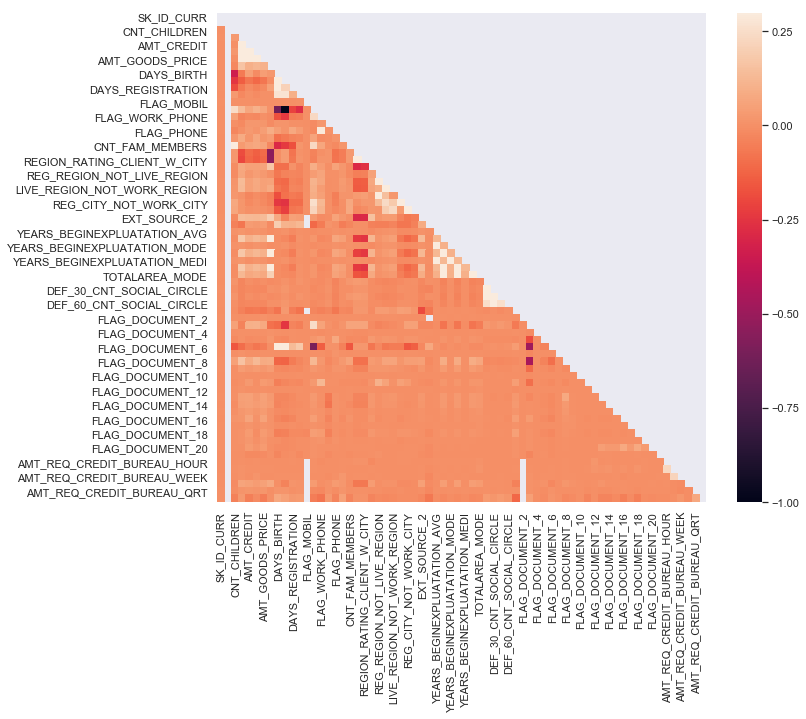

In [46]:
import numpy as np
corr = train_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

###  Finding the top 10 correlation


In [47]:
correlation_0 = train_0.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]

print(correlation_0)

FLAG_DOCUMENT_2               EXT_SOURCE_2                    0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2                 0.000004
FLAG_MOBIL                    FLAG_DOCUMENT_12                0.000005
FLAG_DOCUMENT_12              FLAG_MOBIL                      0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4                 0.000008
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MEDI    0.000008
FLAG_MOBIL                    FLAG_DOCUMENT_10                0.000009
FLAG_DOCUMENT_10              FLAG_MOBIL                      0.000009
FLAG_MOBIL                    FLAG_DOCUMENT_2                 0.000011
FLAG_DOCUMENT_2               FLAG_MOBIL                      0.000011
FLAG_DOCUMENT_10              FLAG_DOCUMENT_12                0.000013
FLAG_DOCUMENT_12              FLAG_DOCUMENT_10                0.000013
                              FLAG_DOCUMENT_2                 0.000015
FLAG_DOCUMENT_2               FLAG_DOCUMENT_12                0.000015
FLAG_M

In [48]:
#### Top correlations
'''
EXT_SOURCE_1                 DAYS_BIRTH                     0.601210

DAYS_EMPLOYED                DAYS_BIRTH                     0.618048

AMT_CREDIT                   AMT_ANNUITY                    0.771309

AMT_GOODS_PRICE              AMT_ANNUITY                    0.776686

LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381

LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861

CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149

AMT_CREDIT                   AMT_GOODS_PRICE                0.987250

DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999758
'''

'\nEXT_SOURCE_1                 DAYS_BIRTH                     0.601210\n\nDAYS_EMPLOYED                DAYS_BIRTH                     0.618048\n\nAMT_CREDIT                   AMT_ANNUITY                    0.771309\n\nAMT_GOODS_PRICE              AMT_ANNUITY                    0.776686\n\nLIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381\n\nLIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861\n\nCNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571\n\nREGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149\n\nAMT_CREDIT                   AMT_GOODS_PRICE                0.987250\n\nDAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999758\n'

In [49]:
### Top correlations for the defaulter
'''
EXT_SOURCE_1                 DAYS_BIRTH                     0.570054

DAYS_EMPLOYED                DAYS_BIRTH                     0.575097

FLAG_EMP_PHONE               DAYS_BIRTH                     0.578519

AMT_CREDIT                   AMT_ANNUITY                    0.752195

AMT_GOODS_PRICE              AMT_ANNUITY                    0.752699

REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637

AMT_CREDIT                   AMT_GOODS_PRICE                0.983103

DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999702
'''

'\nEXT_SOURCE_1                 DAYS_BIRTH                     0.570054\n\nDAYS_EMPLOYED                DAYS_BIRTH                     0.575097\n\nFLAG_EMP_PHONE               DAYS_BIRTH                     0.578519\n\nAMT_CREDIT                   AMT_ANNUITY                    0.752195\n\nAMT_GOODS_PRICE              AMT_ANNUITY                    0.752699\n\nREG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540\n\nREG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885\n\nCNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484\n\nREGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637\n\nAMT_CREDIT                   AMT_GOODS_PRICE                0.983103\n\nDAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999702\n'

### Defaulter correlation

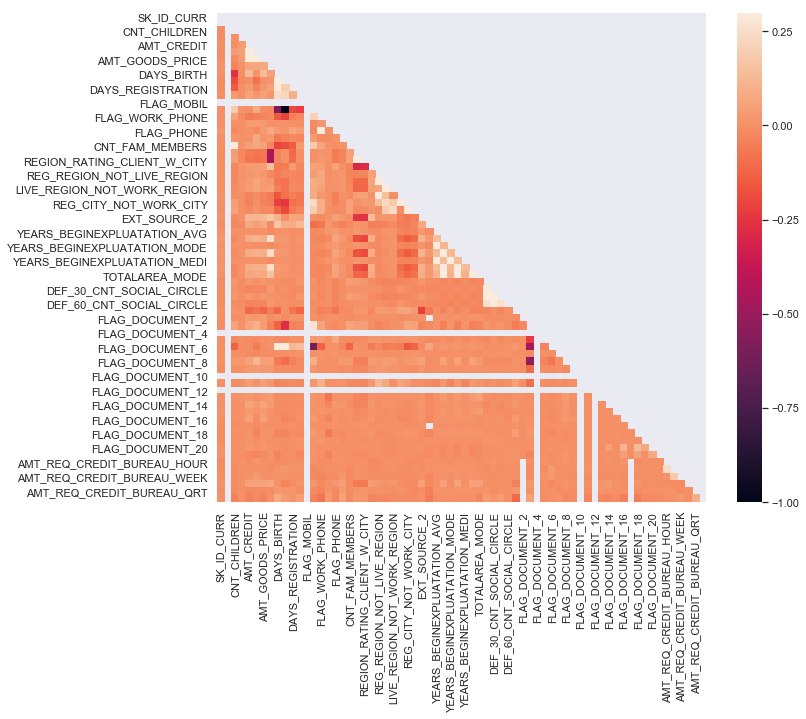

In [50]:
corr = train_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [51]:
correlation_1 = train_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind="quicksort")
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

print(correlation_1)

REGION_RATING_CLIENT          FLAG_DOCUMENT_20                0.000010
FLAG_DOCUMENT_20              REGION_RATING_CLIENT            0.000010
LIVE_REGION_NOT_WORK_REGION   REG_CITY_NOT_LIVE_CITY          0.000011
REG_CITY_NOT_LIVE_CITY        LIVE_REGION_NOT_WORK_REGION     0.000011
AMT_REQ_CREDIT_BUREAU_WEEK    AMT_INCOME_TOTAL                0.000018
AMT_INCOME_TOTAL              AMT_REQ_CREDIT_BUREAU_WEEK      0.000018
DAYS_BIRTH                    FLAG_DOCUMENT_20                0.000019
FLAG_DOCUMENT_20              DAYS_BIRTH                      0.000019
FLAG_EMP_PHONE                EXT_SOURCE_2                    0.000028
EXT_SOURCE_2                  FLAG_EMP_PHONE                  0.000028
FLAG_DOCUMENT_21              OBS_30_CNT_SOCIAL_CIRCLE        0.000039
OBS_30_CNT_SOCIAL_CIRCLE      FLAG_DOCUMENT_21                0.000039
YEARS_BEGINEXPLUATATION_AVG   AMT_REQ_CREDIT_BUREAU_MON       0.000058
AMT_REQ_CREDIT_BUREAU_MON     YEARS_BEGINEXPLUATATION_AVG     0.000058
YEARS_

### Analysing through box plot

In [52]:
train_categorical = train.select_dtypes(include=['int64', 'float64']).columns

## Analysis for the outliers

Potting the numerial data based on the index and analysing if there are outliers in any of the column. 

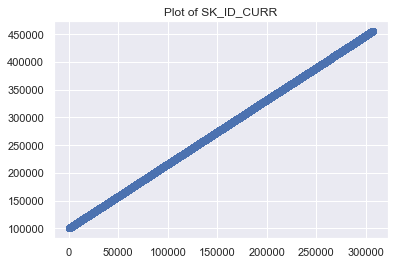

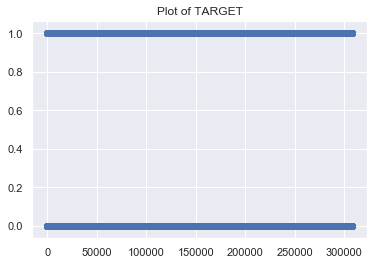

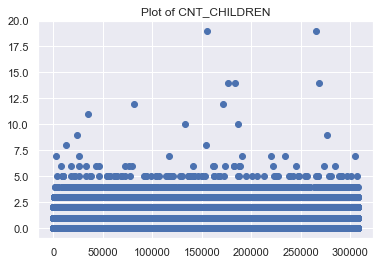

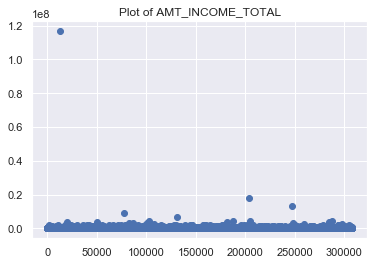

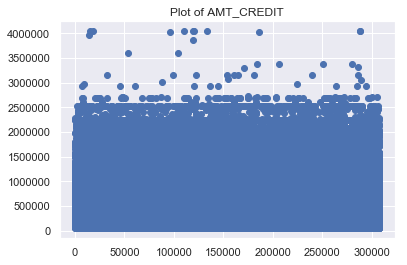

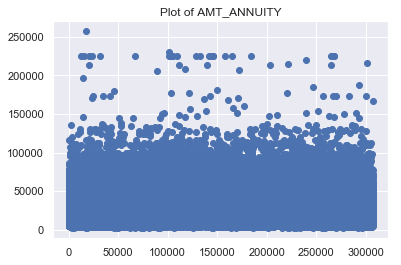

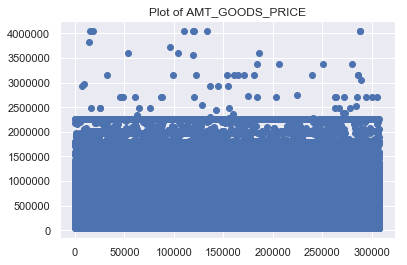

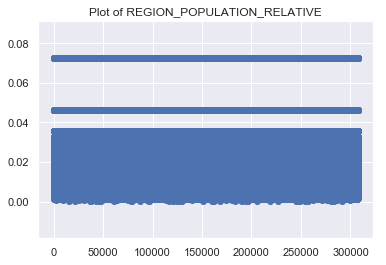

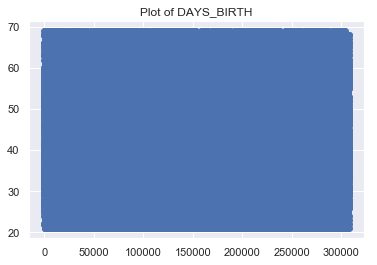

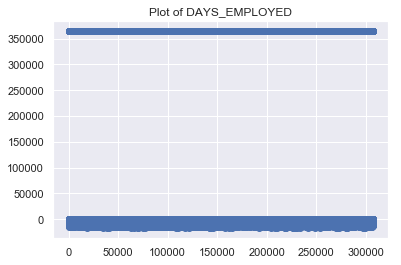

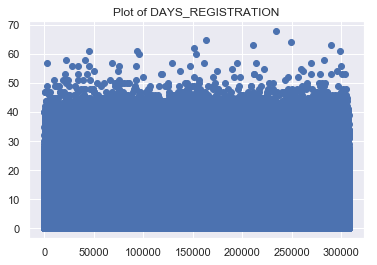

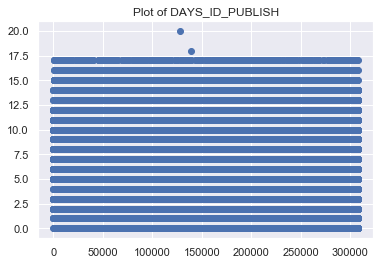

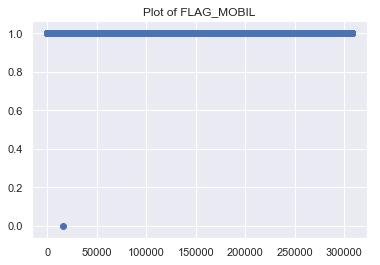

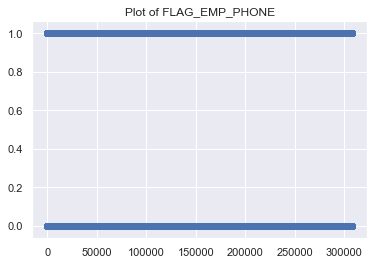

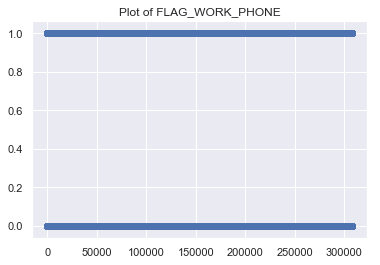

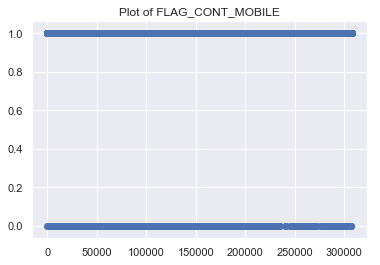

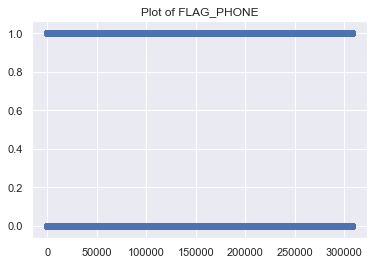

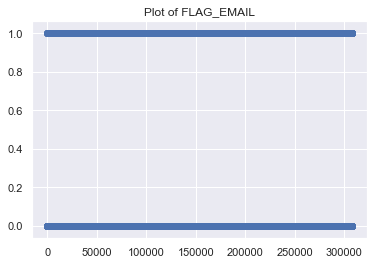

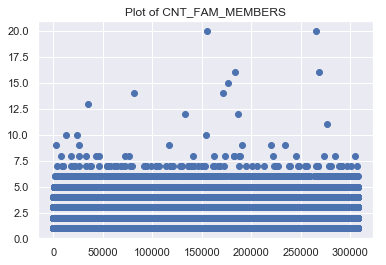

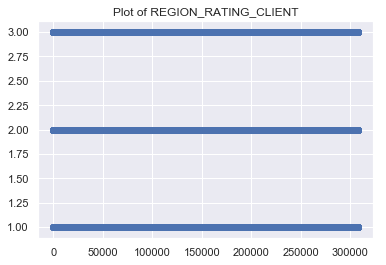

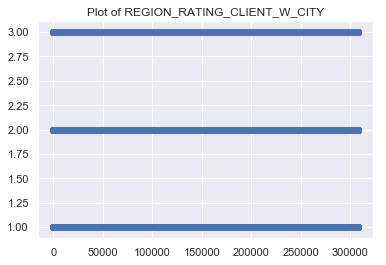

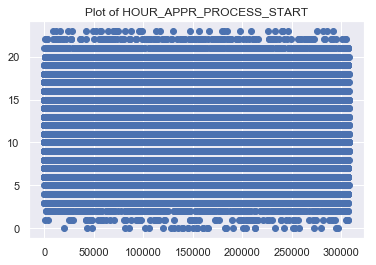

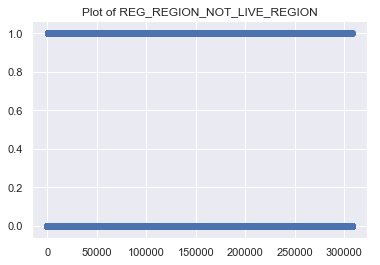

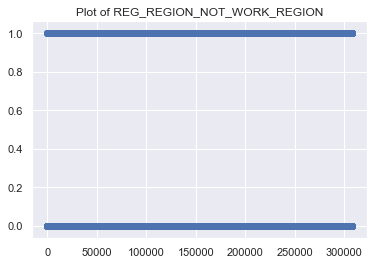

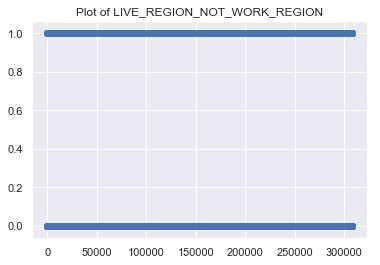

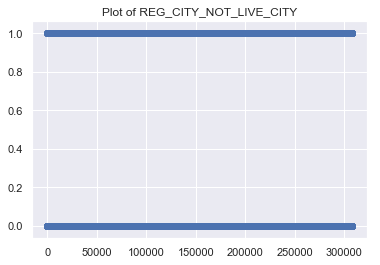

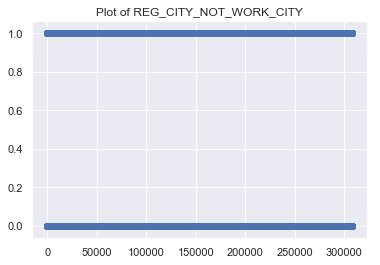

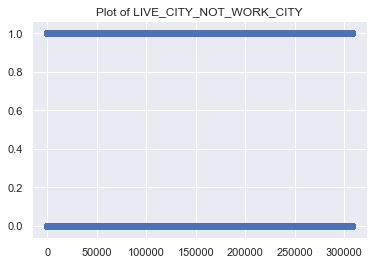

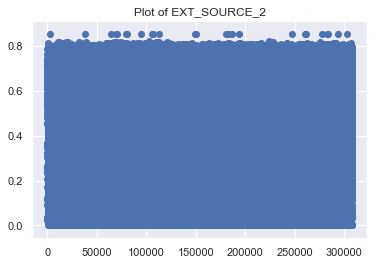

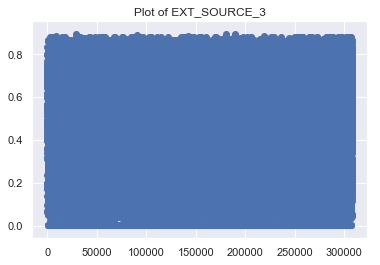

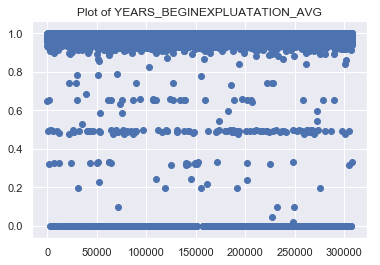

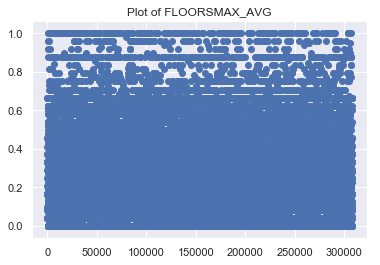

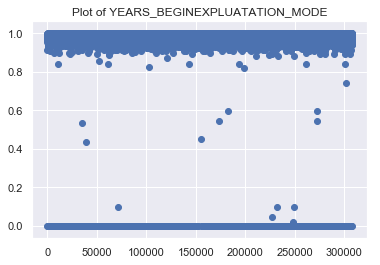

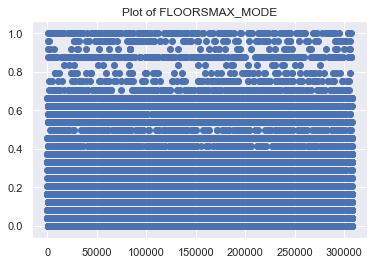

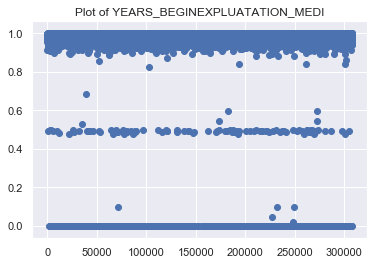

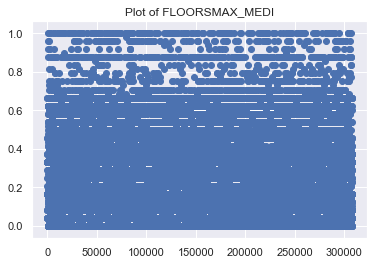

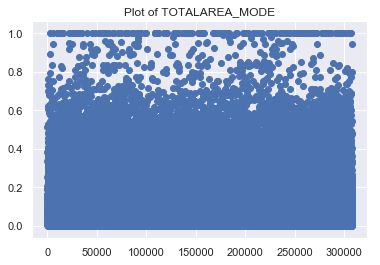

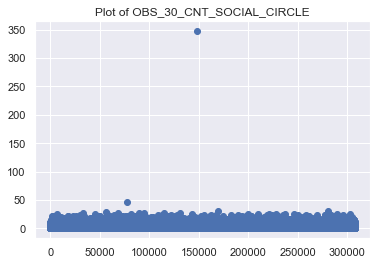

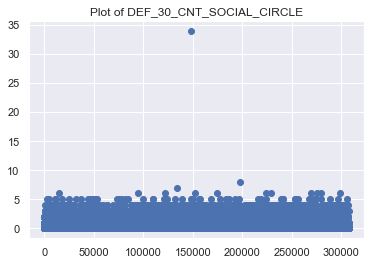

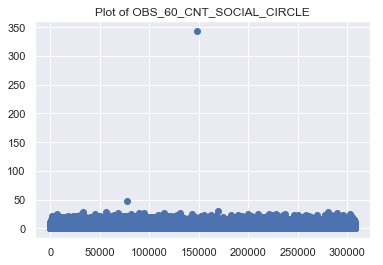

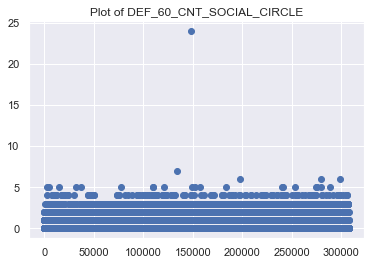

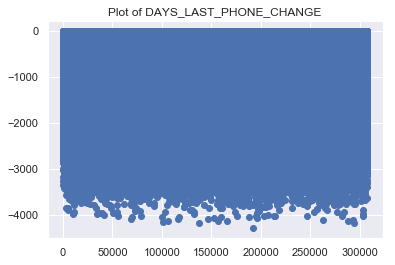

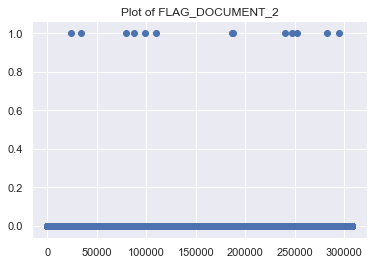

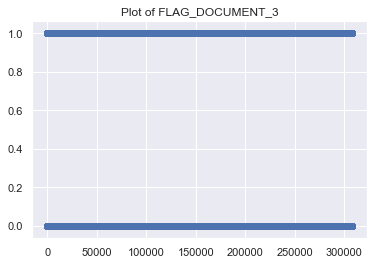

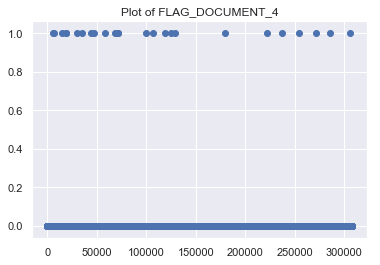

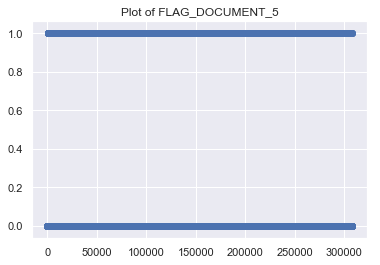

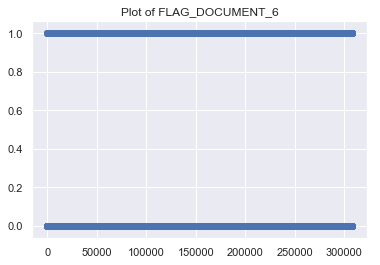

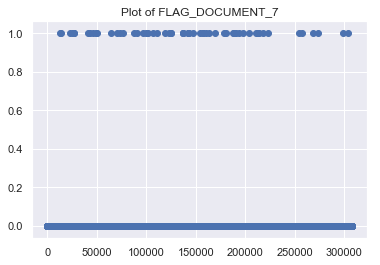

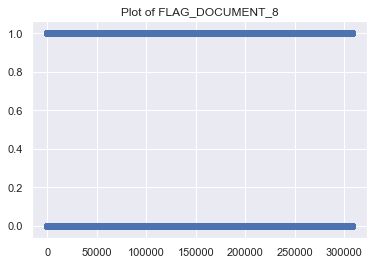

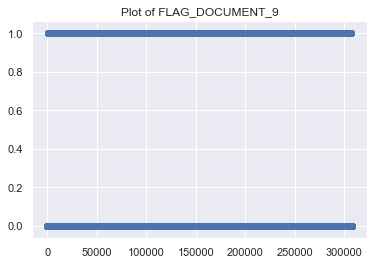

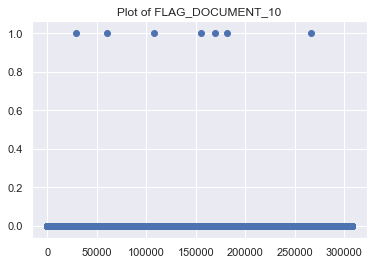

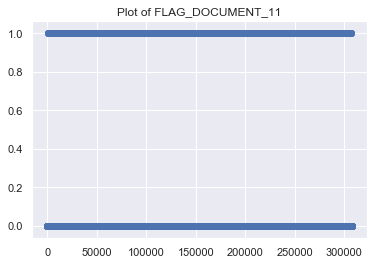

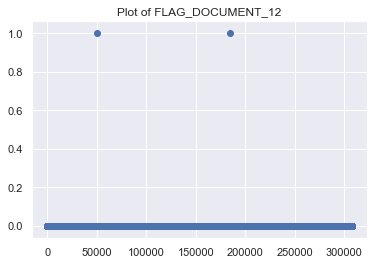

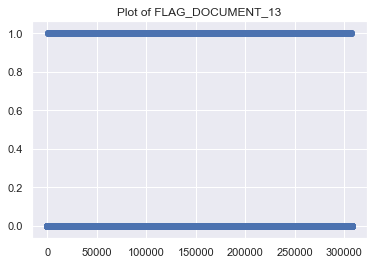

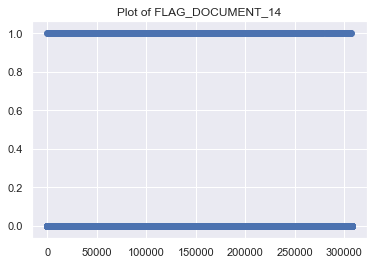

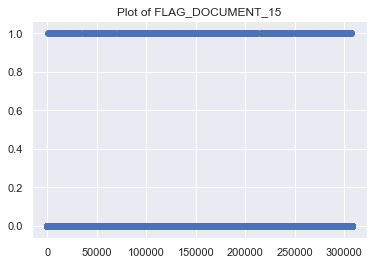

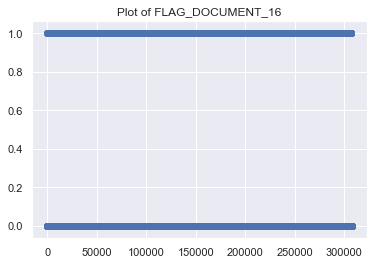

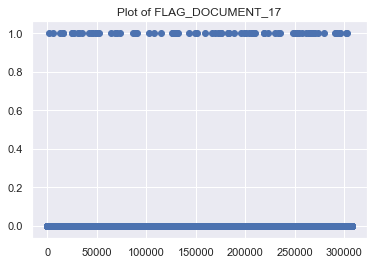

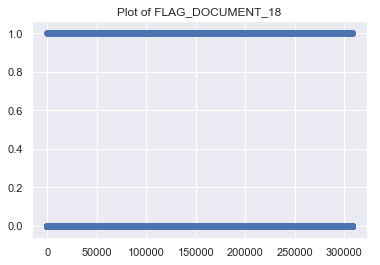

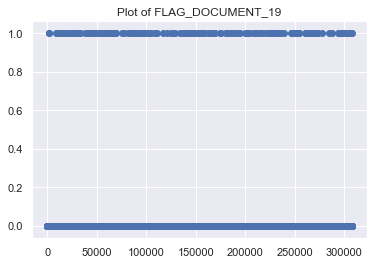

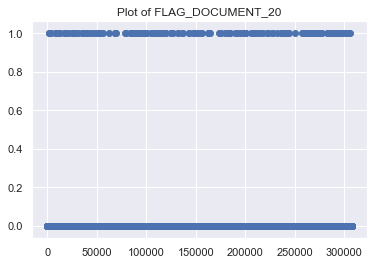

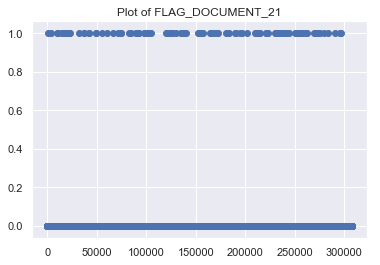

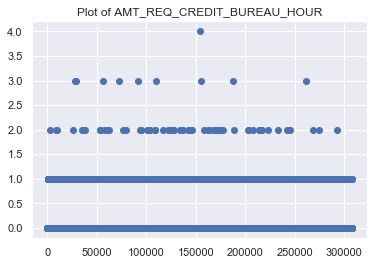

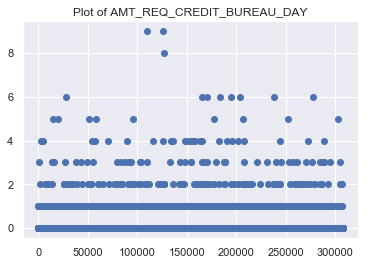

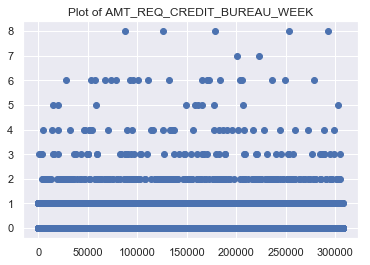

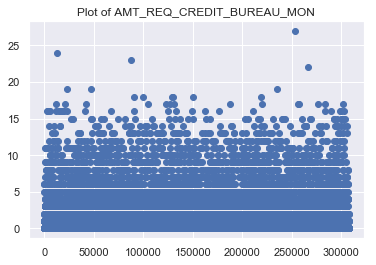

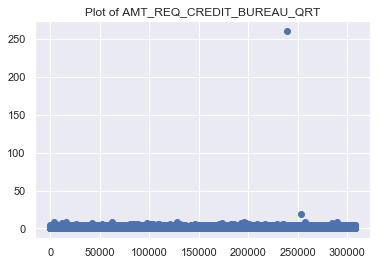

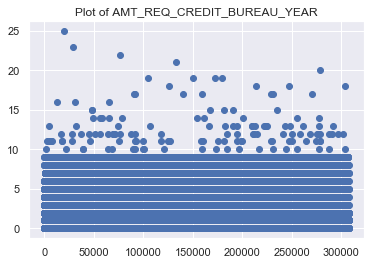

In [54]:
for column in train_categorical:
    title = "Plot of "+column
    plt.scatter(train.index, train[column])
    plt.title(title)
    plt.show()

The analysis of the outliers is mainly based on the bussiness problem. And if the data does not have any error, removing the extreme value will be based on the bussiness need. By analysing the different plots, its seems that there are no error in reporting of the data. So, instead of removing those, we will just point out the columns which contain extreme values. 
Some of the columns that need to be analyses are:
- CNT_CHILDREN - Count of children - Some client have >10 childen, which looks like an extreme value. 
- AMT_INCOME_TOTAL - Income of the client - One value with value ~1.2 1e8 seems to be outlier as the value is significantly far away form others and can be removed. 
- FLAG_MOBILE - There may be a case where a client does not have mobile. Not sure whether it qualifies to be an outlier. 

Similary, you can see some other columns such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE etc. 


## Converting a numerial data to categorical for analysis

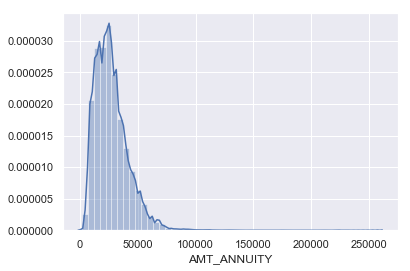

In [67]:
sns.distplot(train['AMT_ANNUITY'].dropna())

In [68]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

train['amt_annuity_categorical'] = train['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


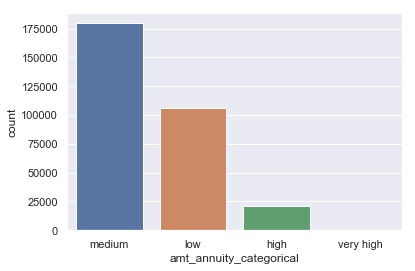

In [69]:
sns.countplot(x= 'amt_annuity_categorical', data = train)

# Univariate Analysis for numerical data

For univariate analysis of the numerical columns, we will plot the histogram and the distribution plot. 

Plot of SK_ID_CURR


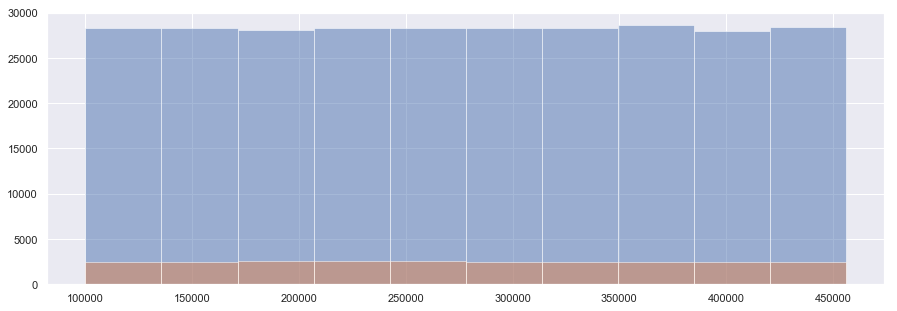

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


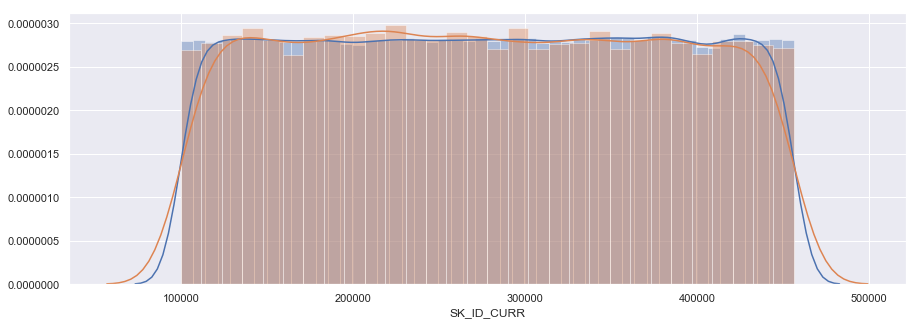

------------------------------------------------------------------------
Plot of TARGET


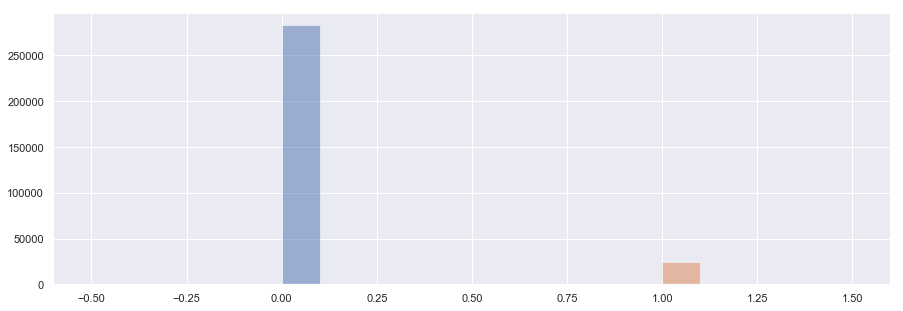

C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


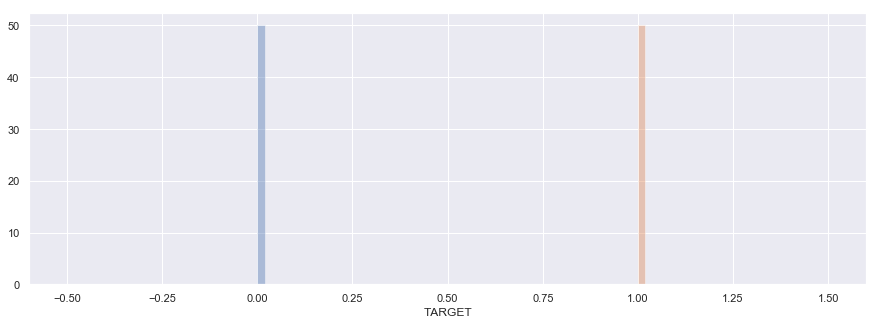

------------------------------------------------------------------------
Plot of CNT_CHILDREN


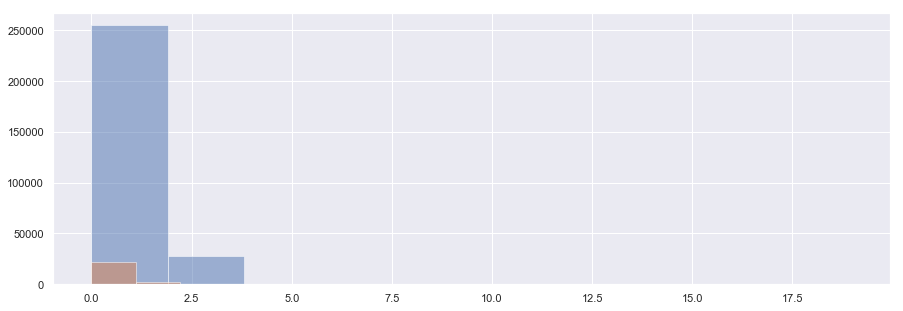

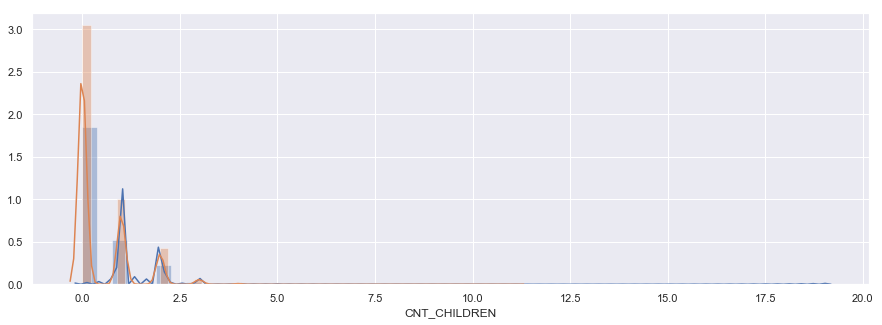

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


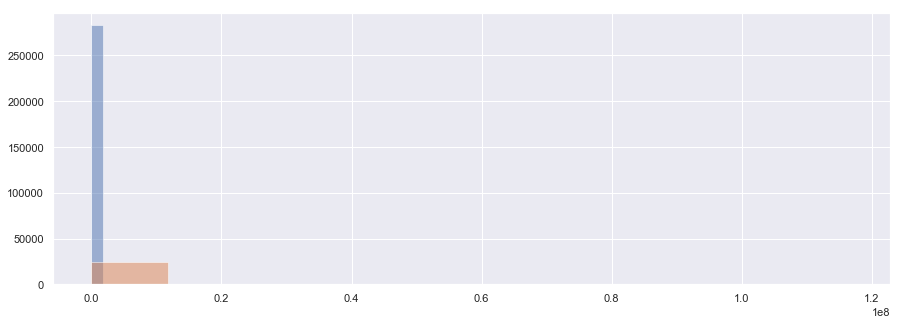

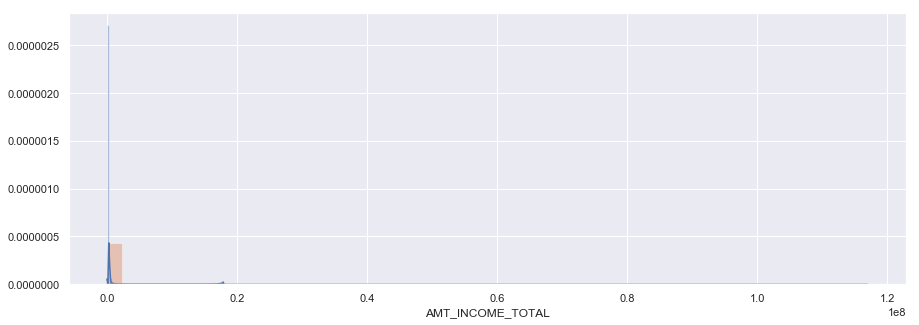

------------------------------------------------------------------------
Plot of AMT_CREDIT


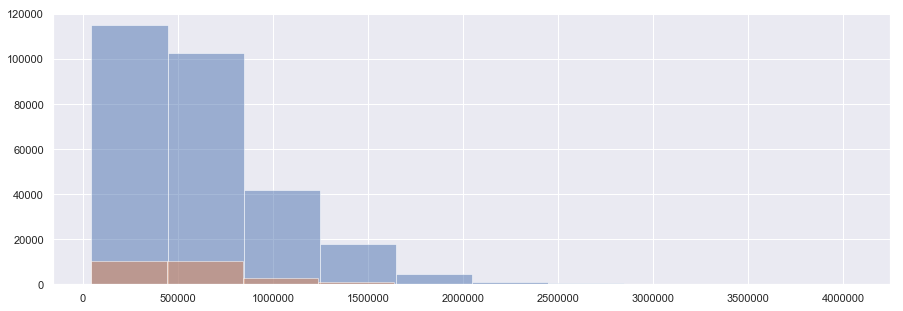

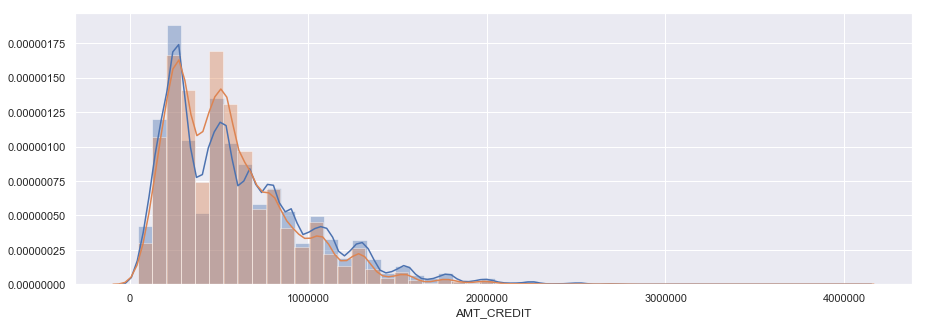

------------------------------------------------------------------------
Plot of AMT_ANNUITY


C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\govindam.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


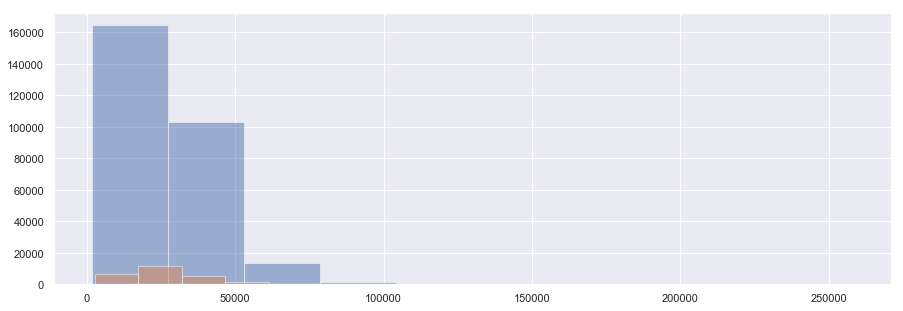

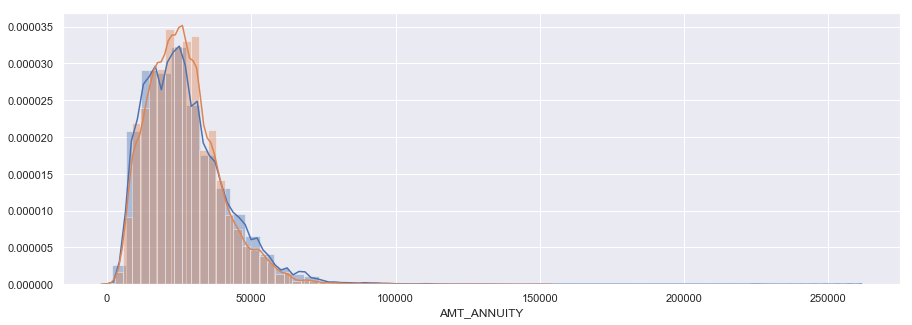

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


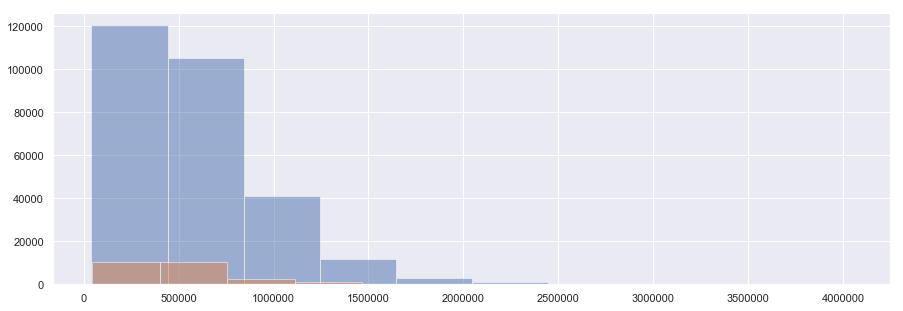

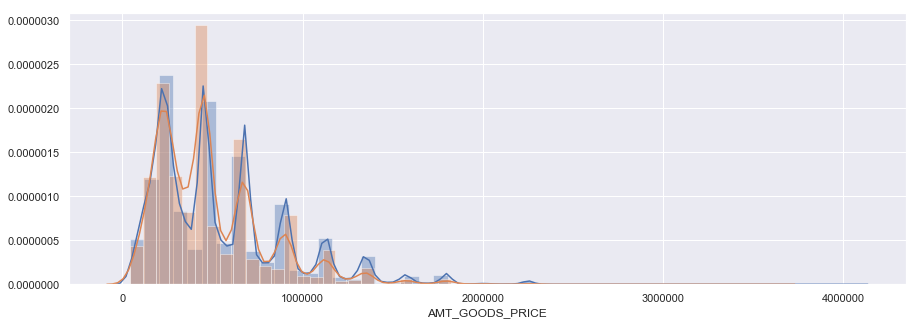

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


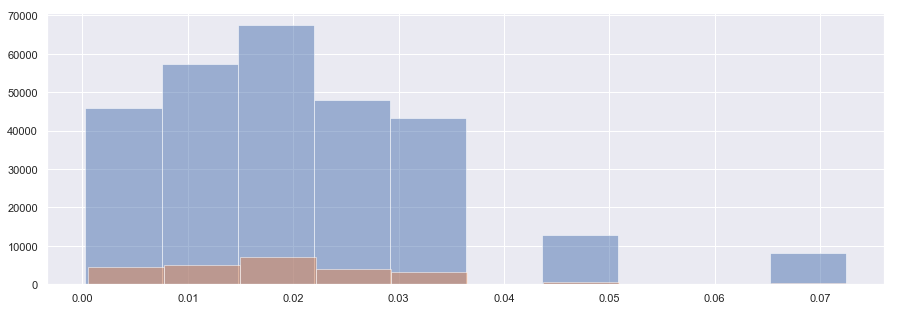

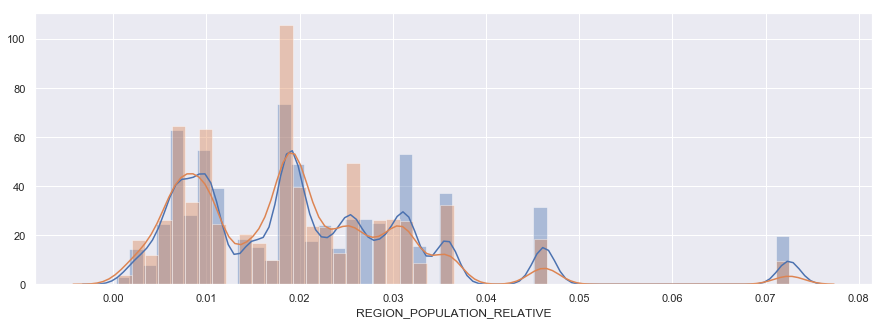

------------------------------------------------------------------------
Plot of DAYS_BIRTH


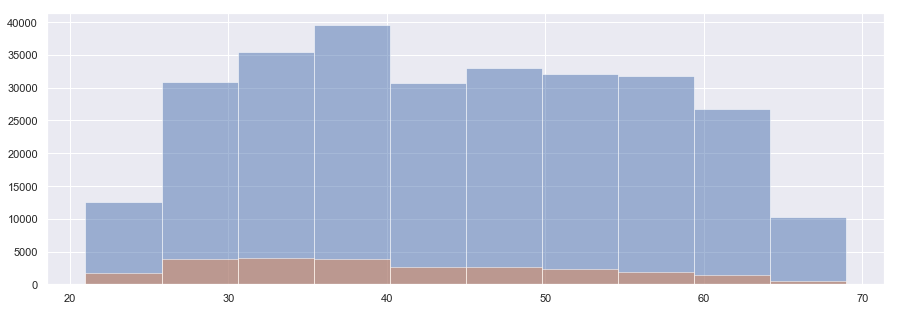

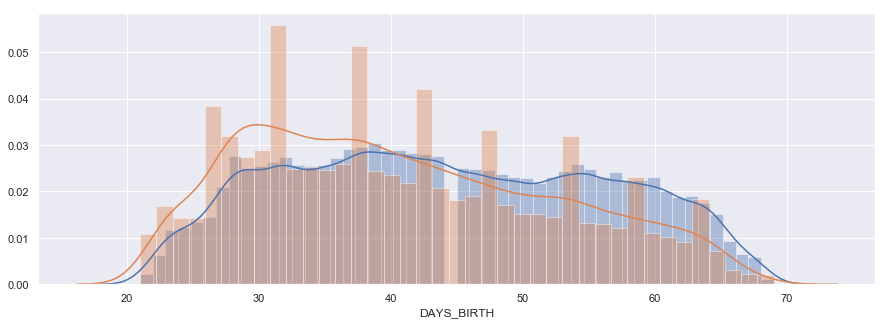

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


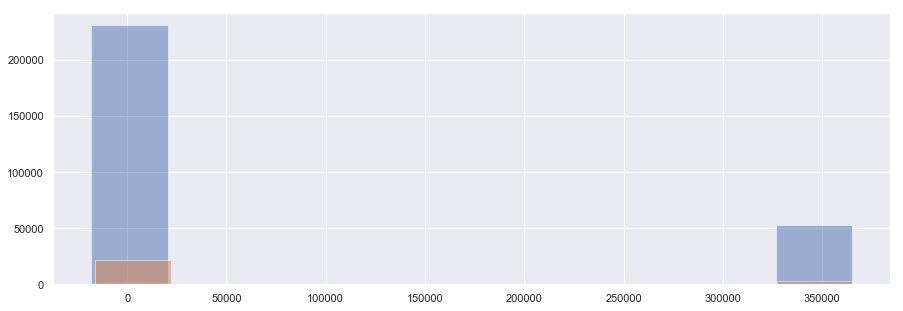

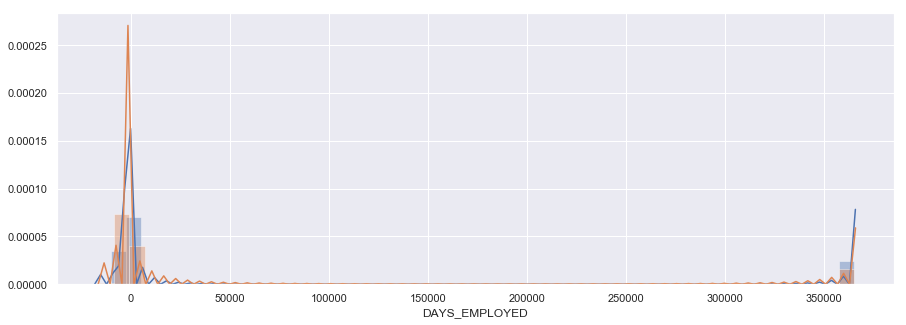

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


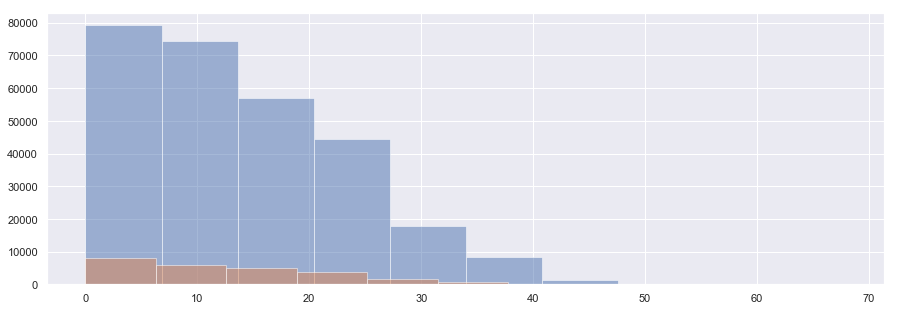

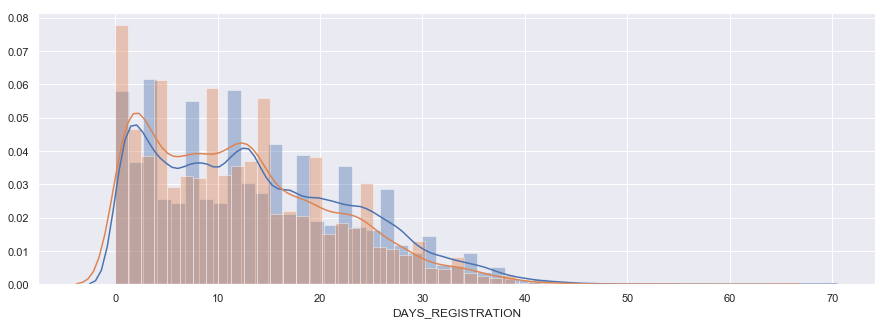

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


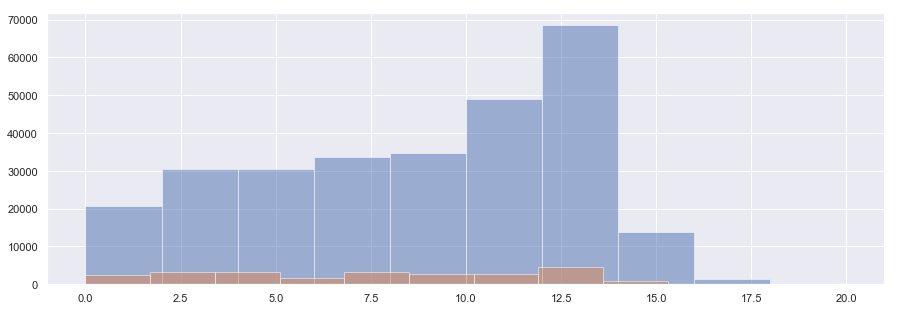

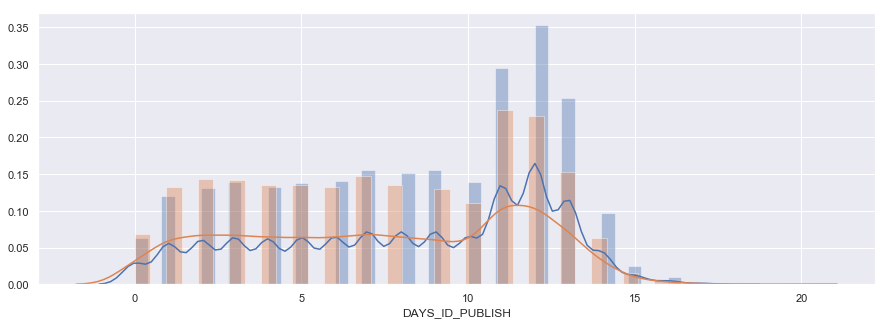

------------------------------------------------------------------------
Plot of FLAG_MOBIL


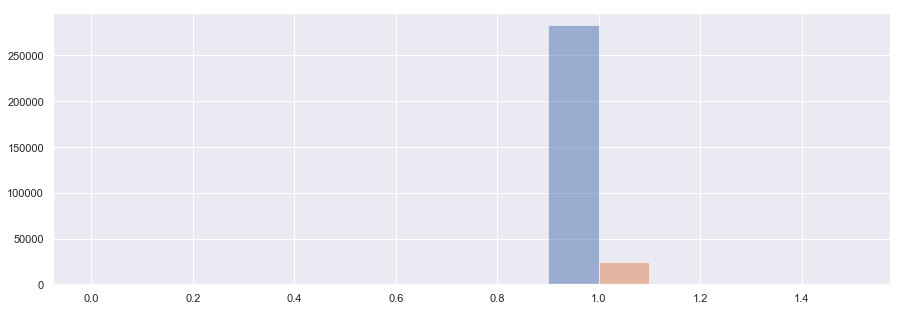

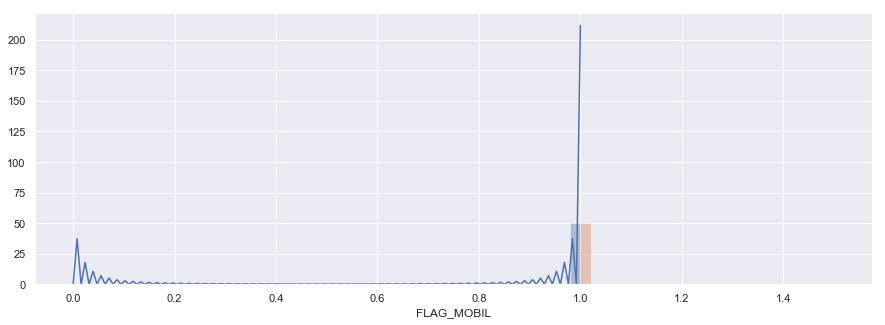

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


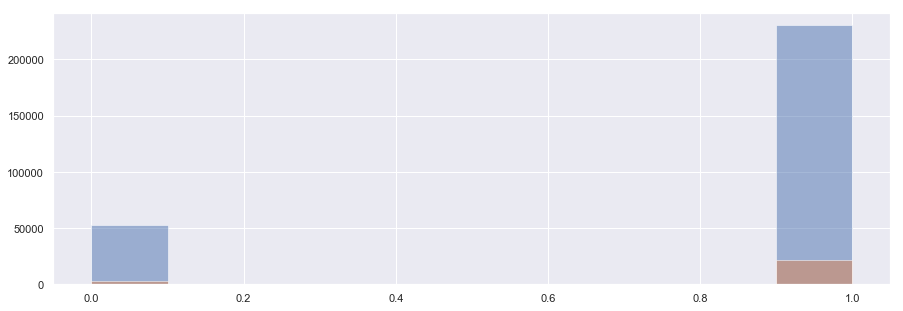

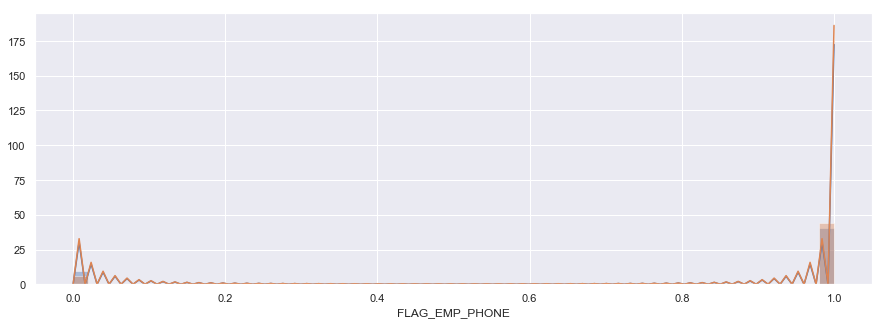

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


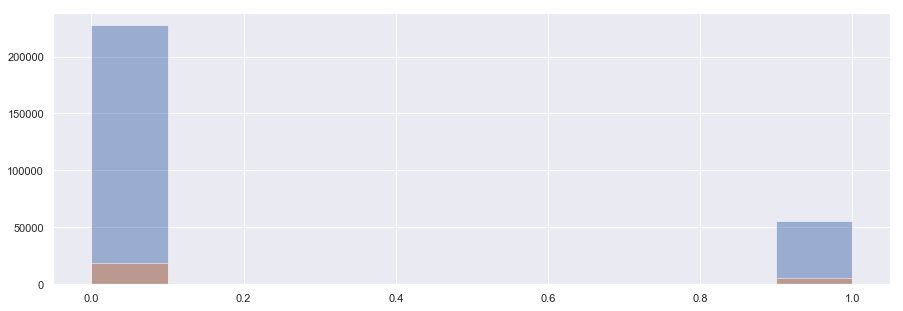

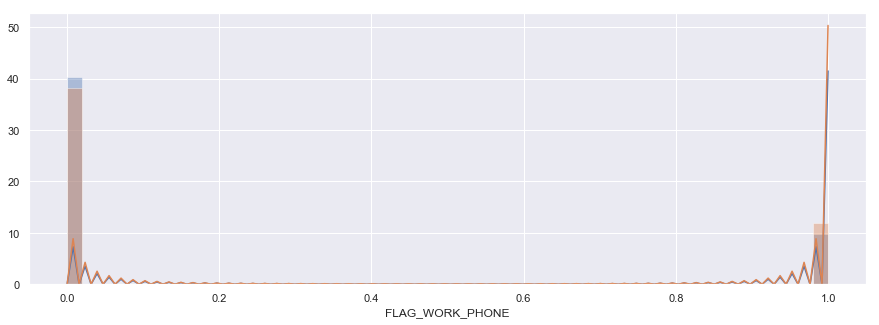

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


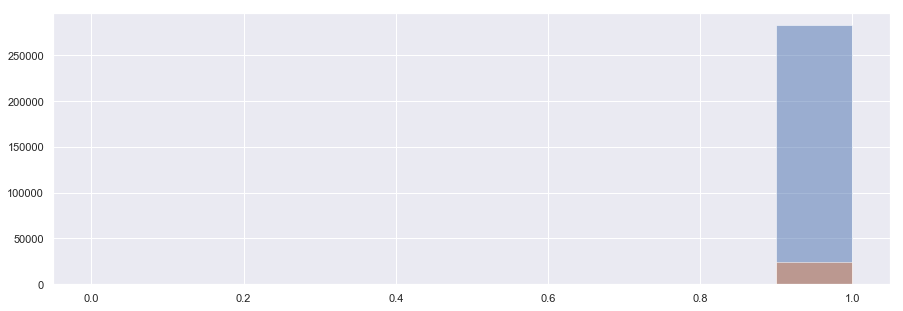

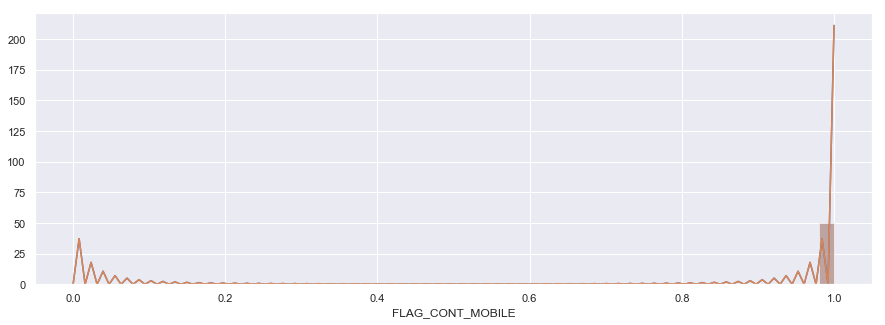

------------------------------------------------------------------------
Plot of FLAG_PHONE


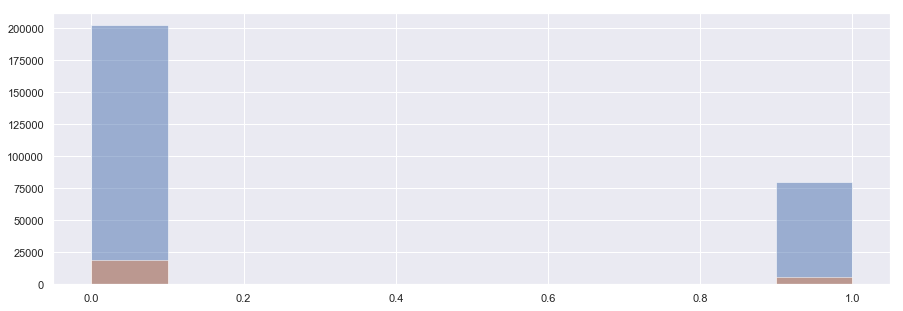

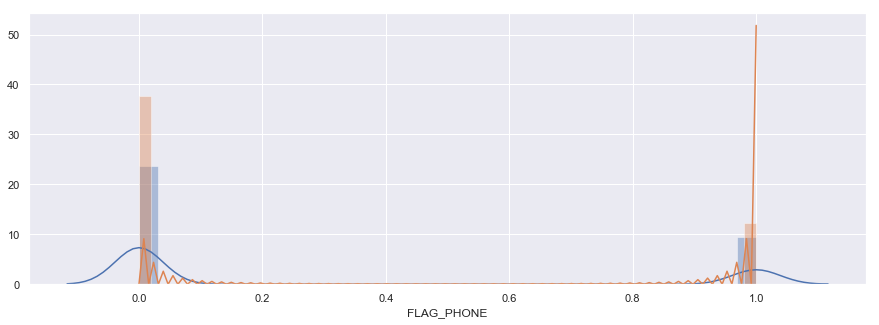

------------------------------------------------------------------------
Plot of FLAG_EMAIL


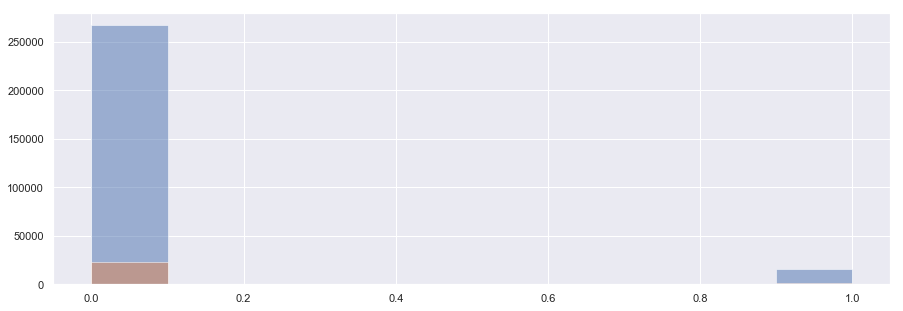

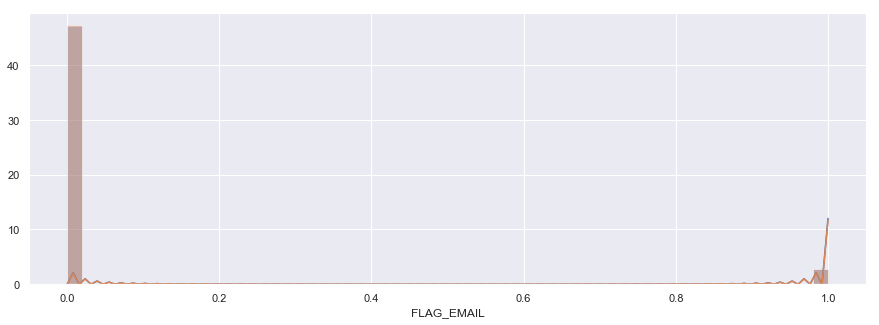

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


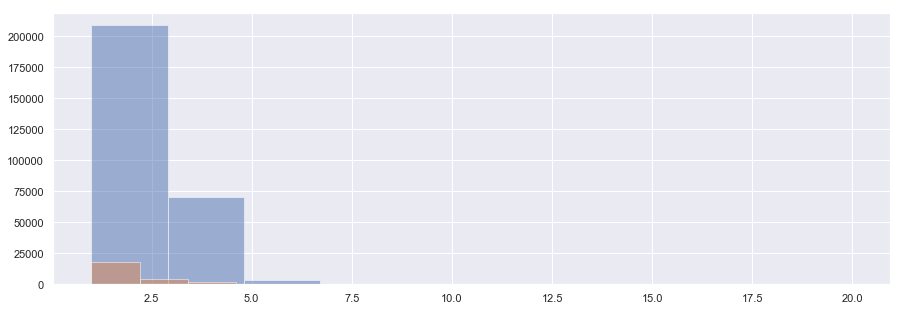

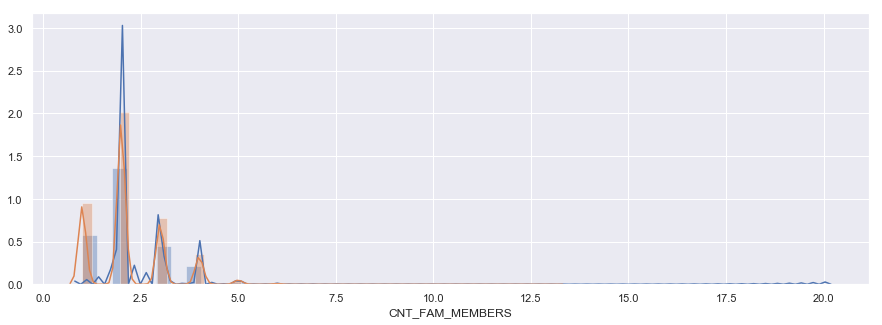

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


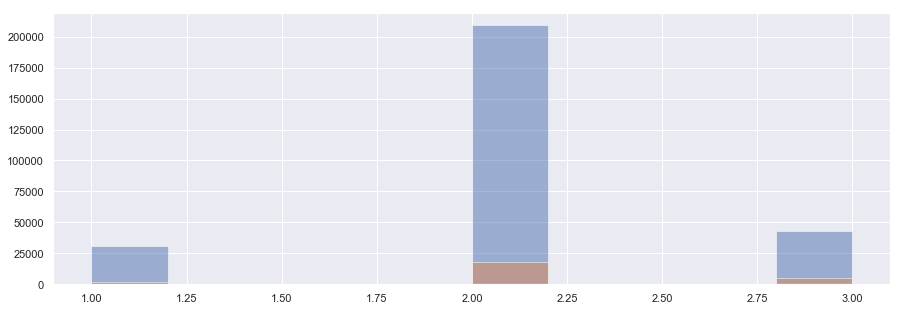

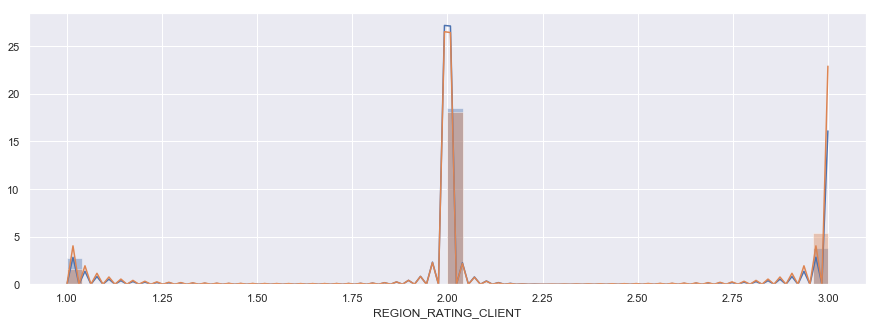

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


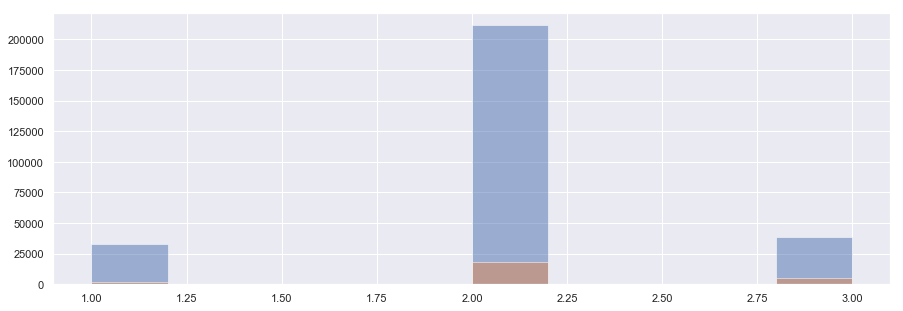

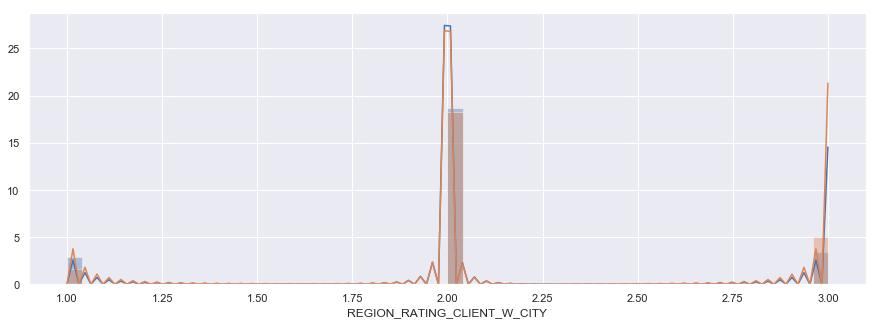

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


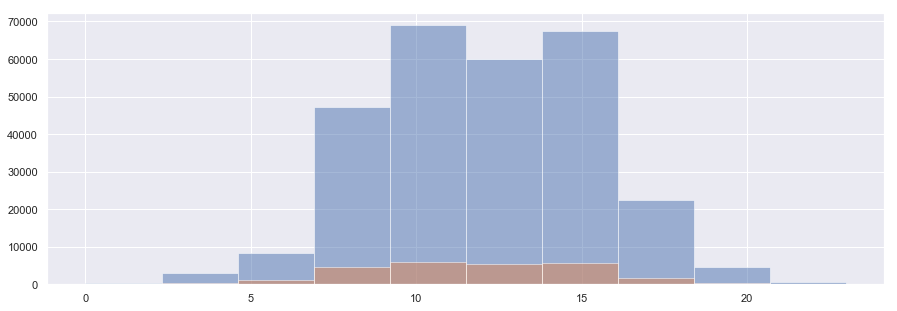

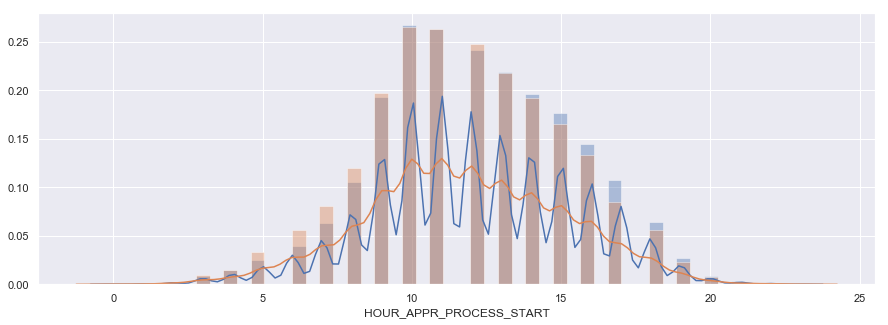

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


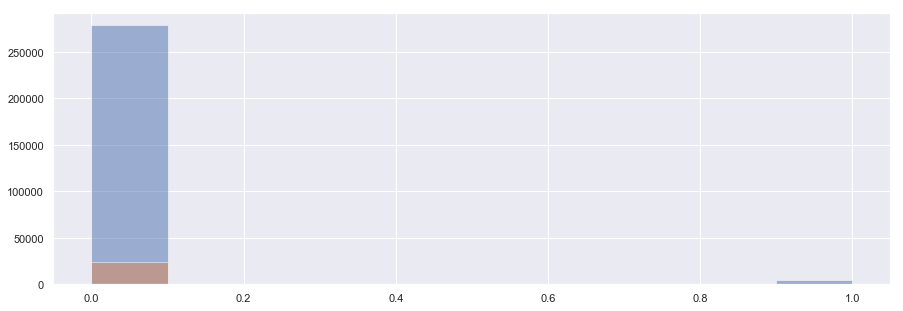

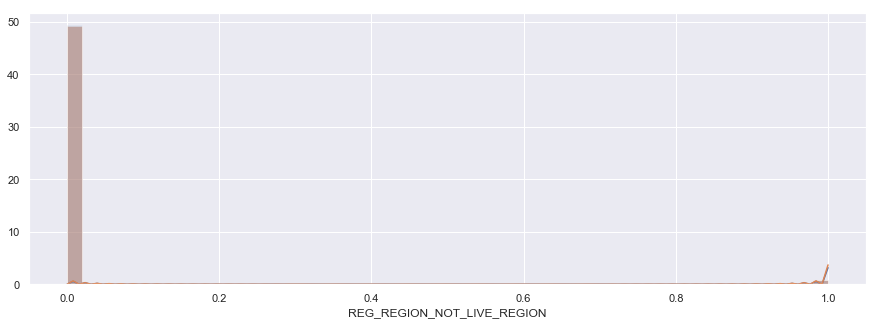

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


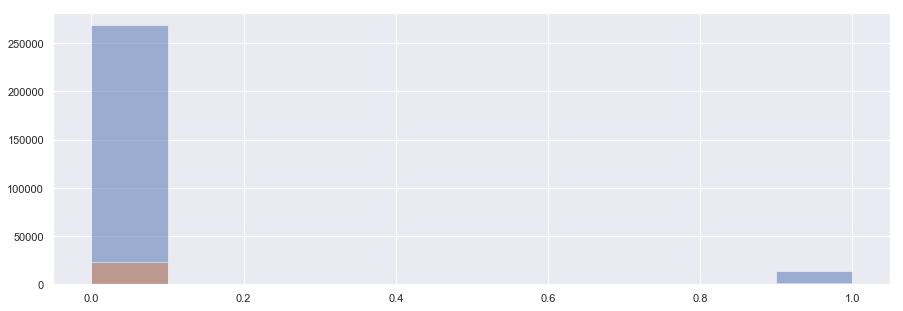

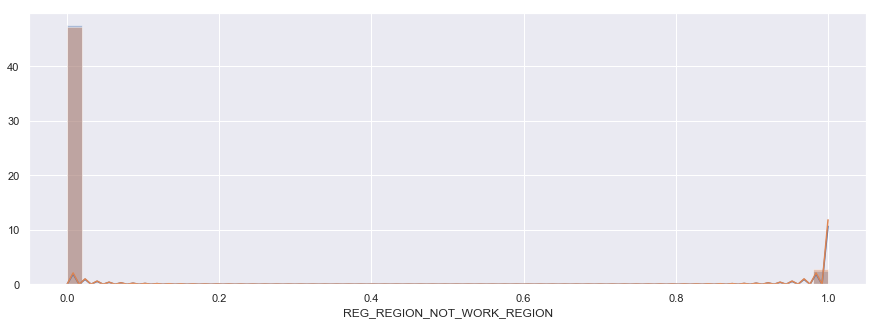

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


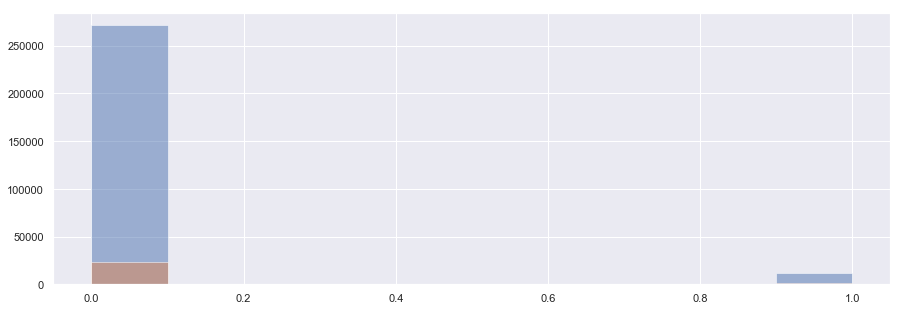

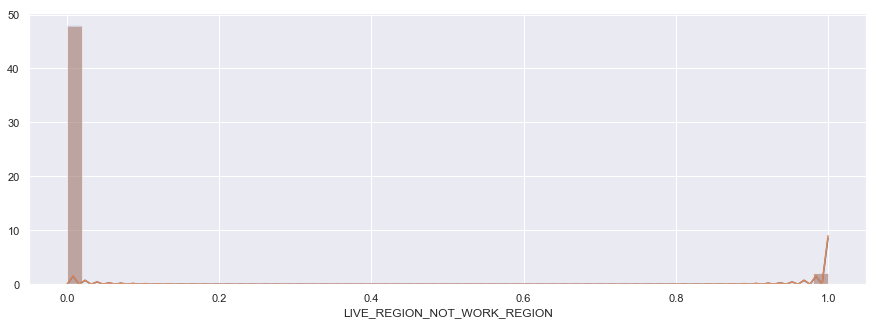

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


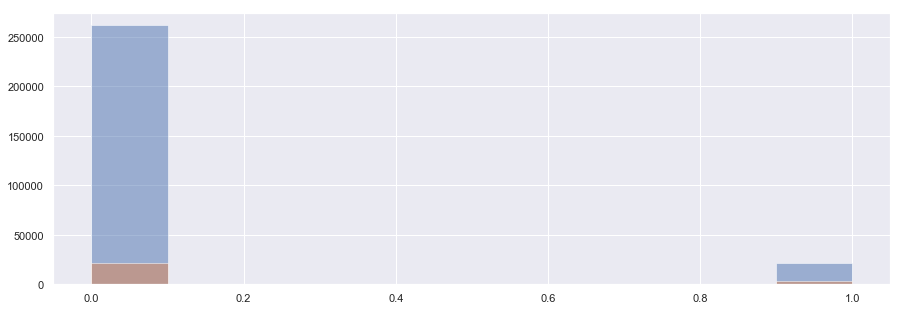

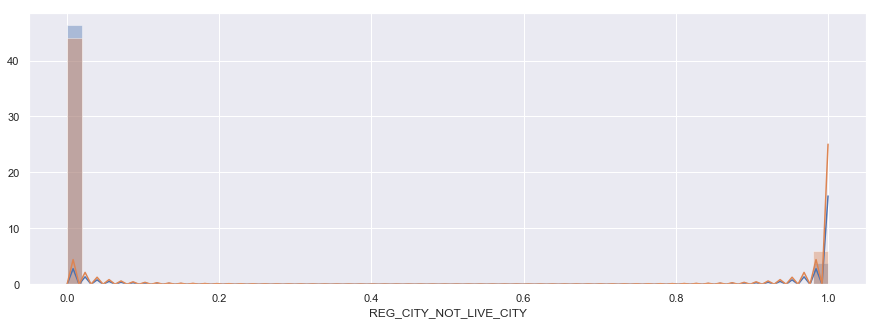

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


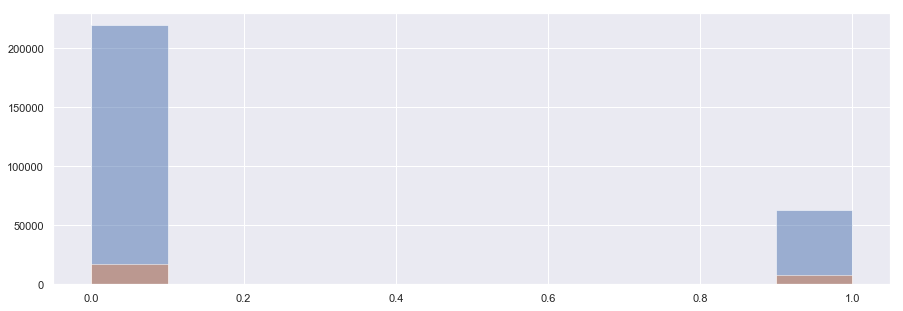

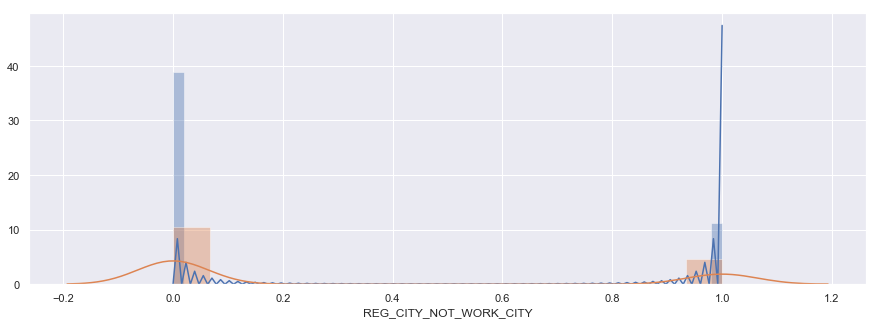

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


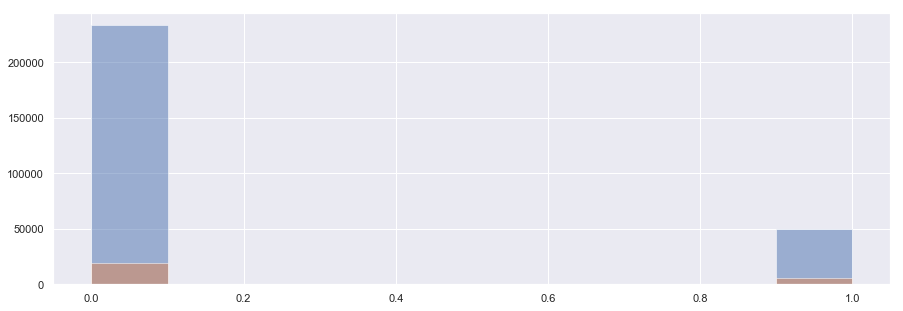

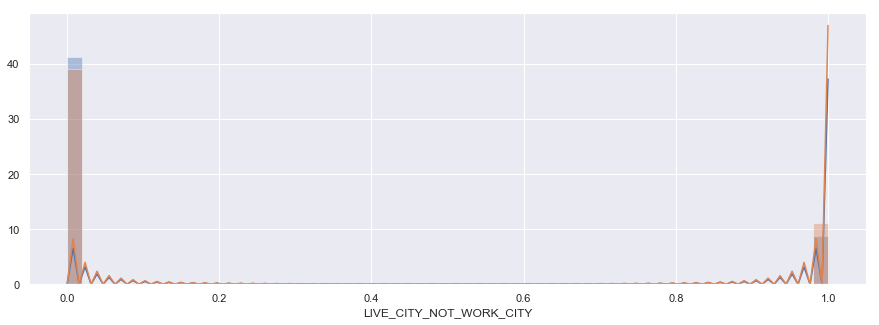

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


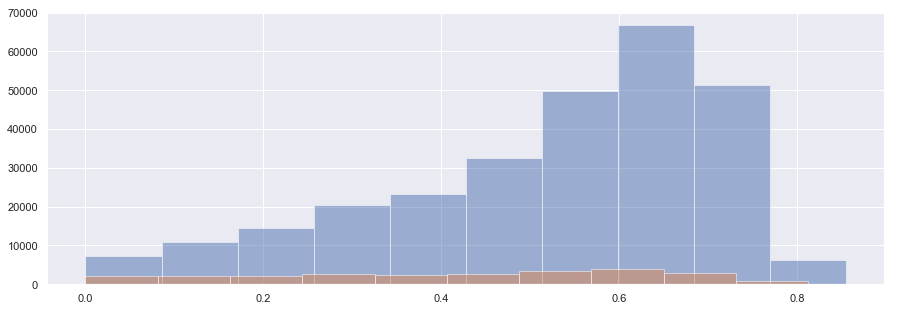

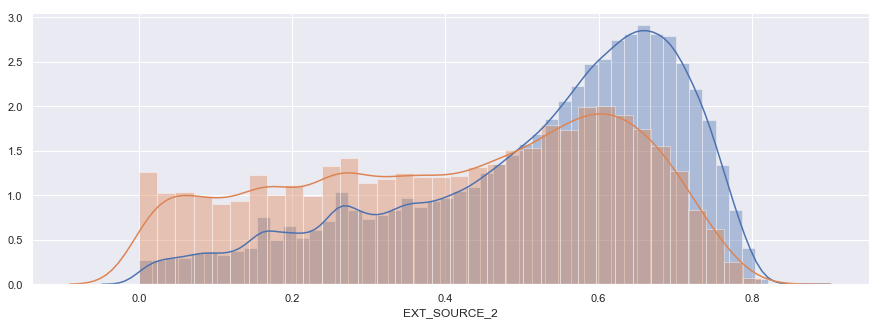

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


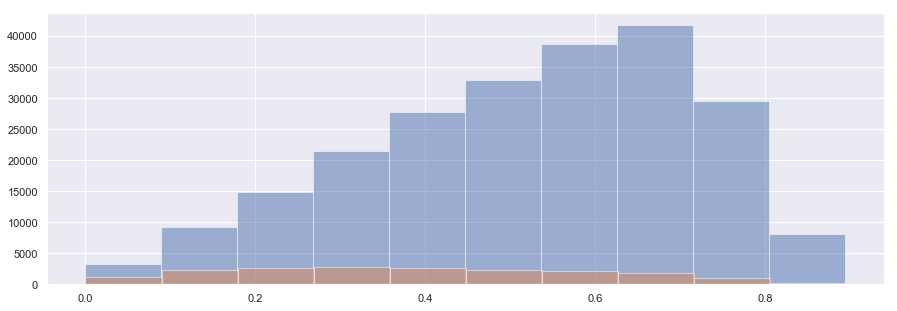

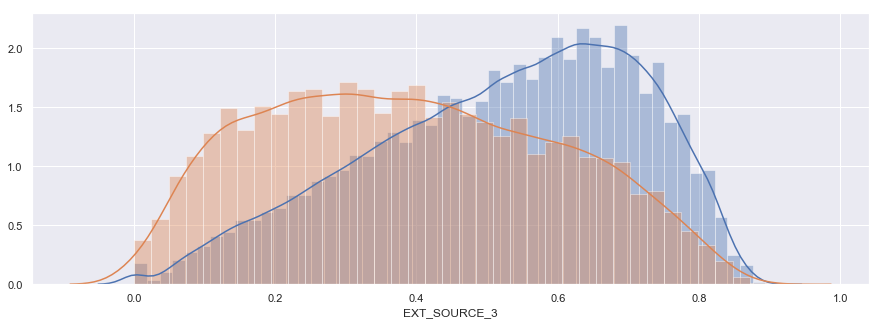

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_AVG


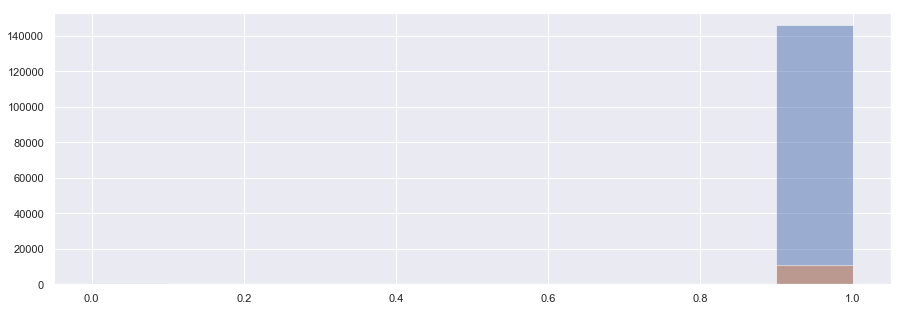

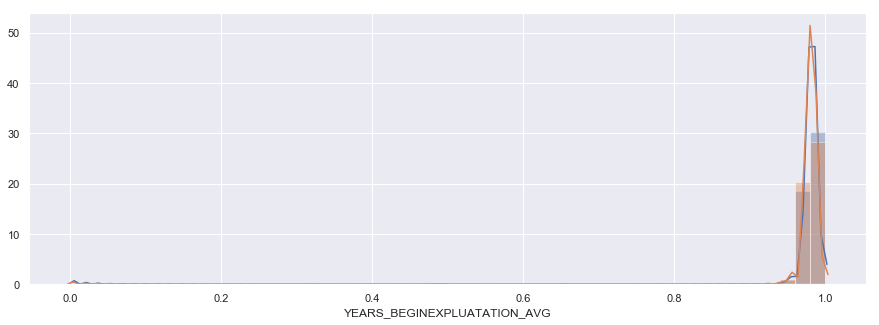

------------------------------------------------------------------------
Plot of FLOORSMAX_AVG


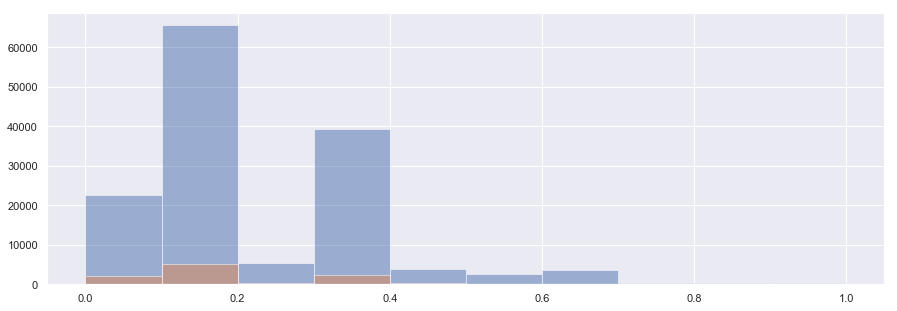

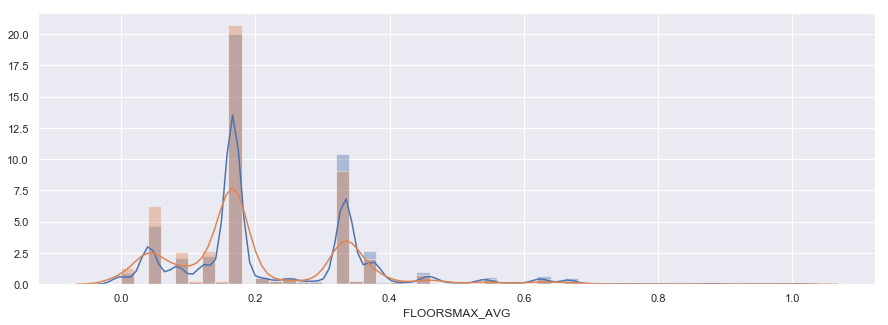

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MODE


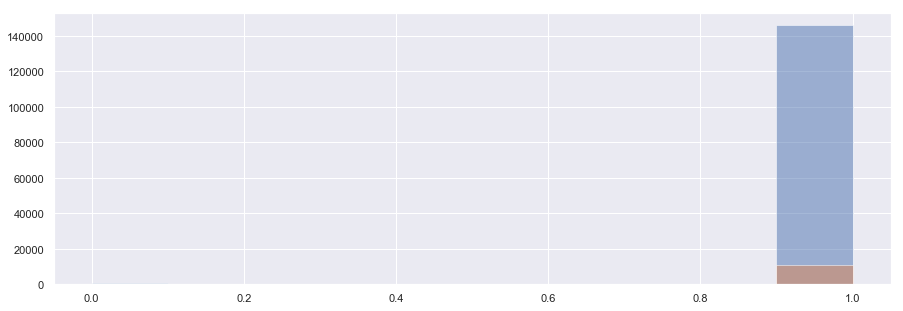

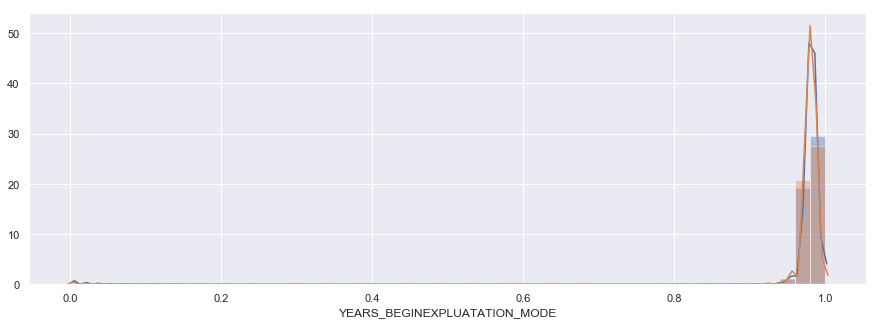

------------------------------------------------------------------------
Plot of FLOORSMAX_MODE


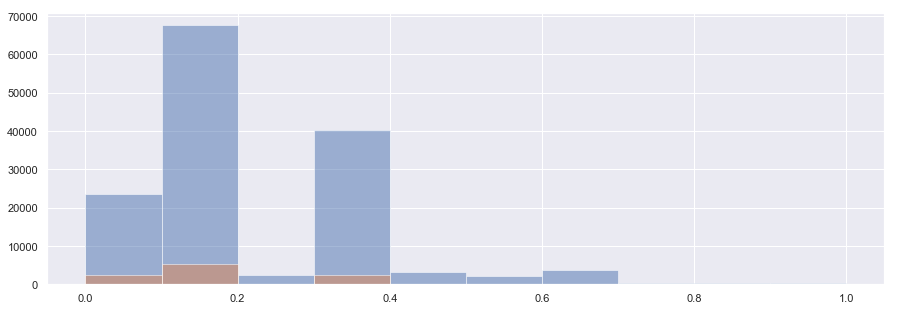

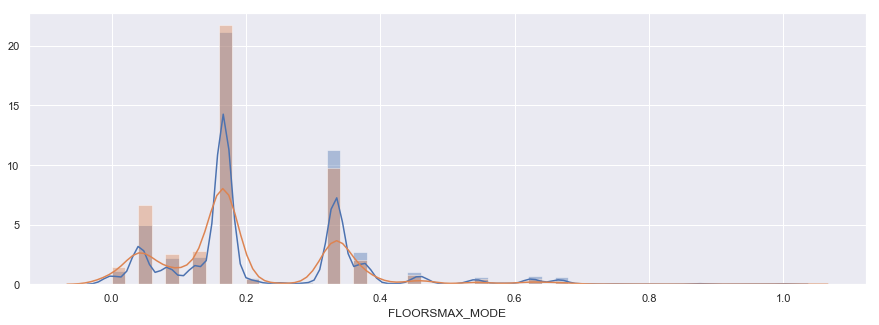

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MEDI


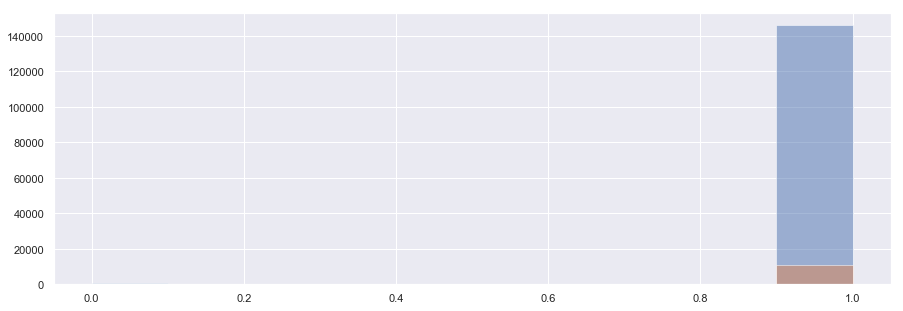

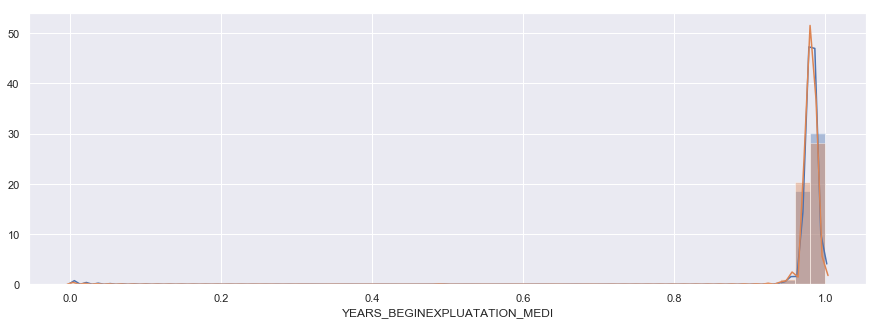

------------------------------------------------------------------------
Plot of FLOORSMAX_MEDI


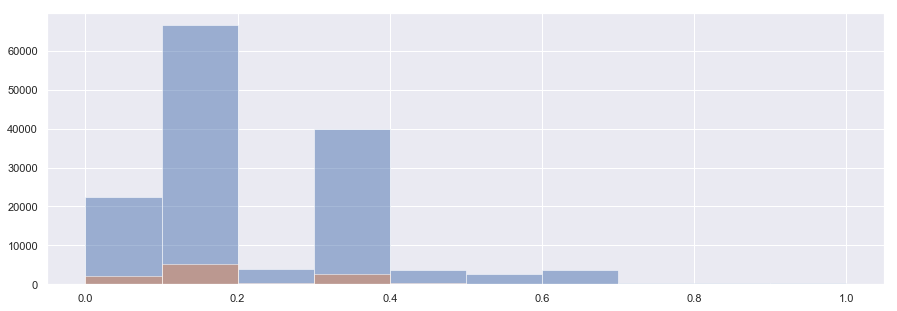

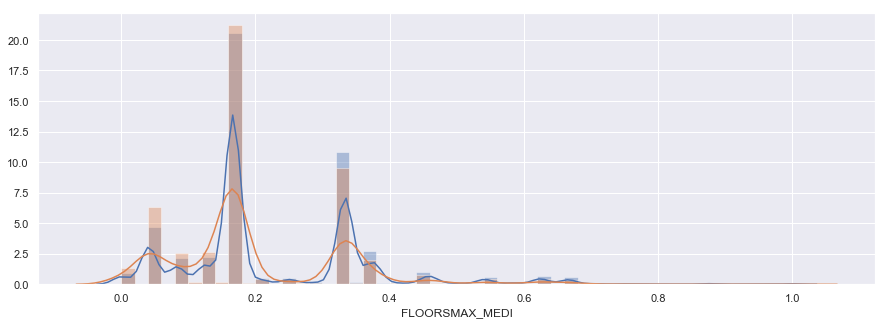

------------------------------------------------------------------------
Plot of TOTALAREA_MODE


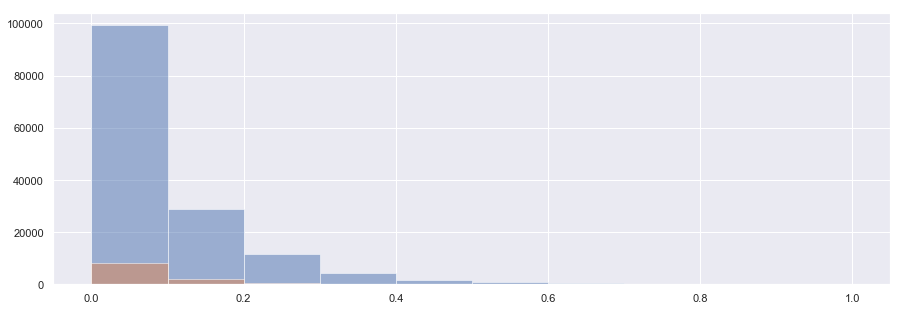

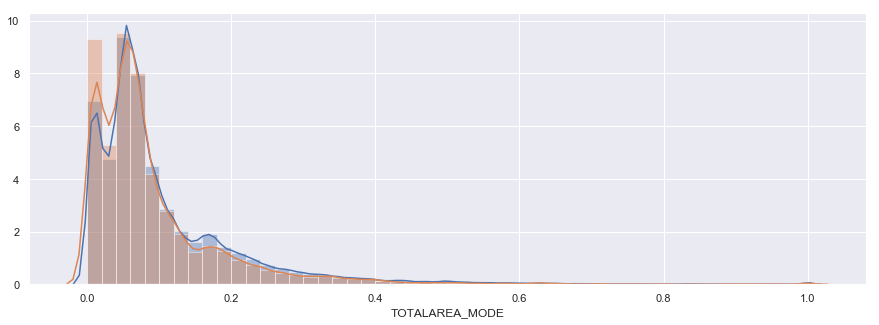

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


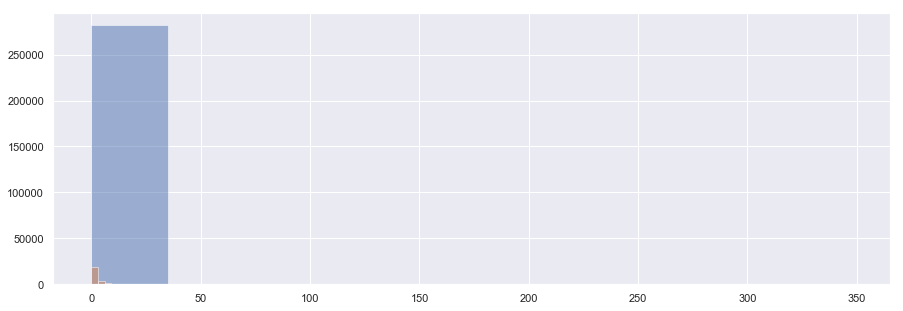

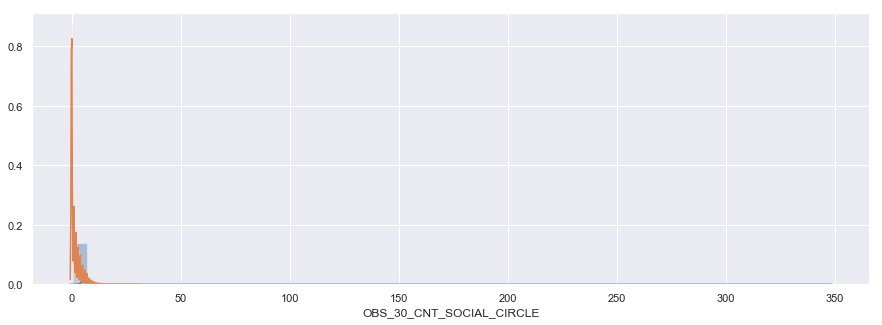

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


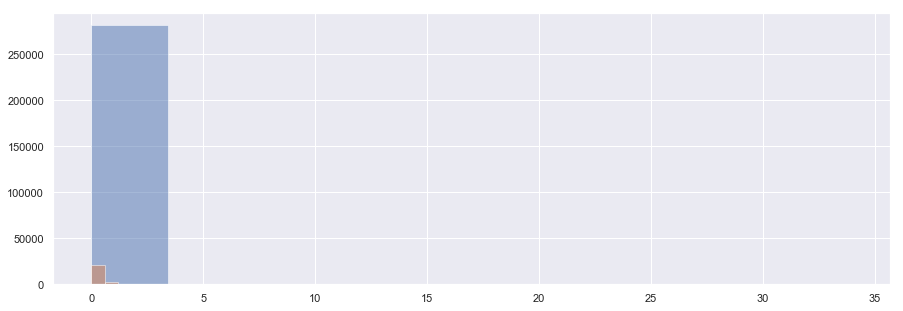

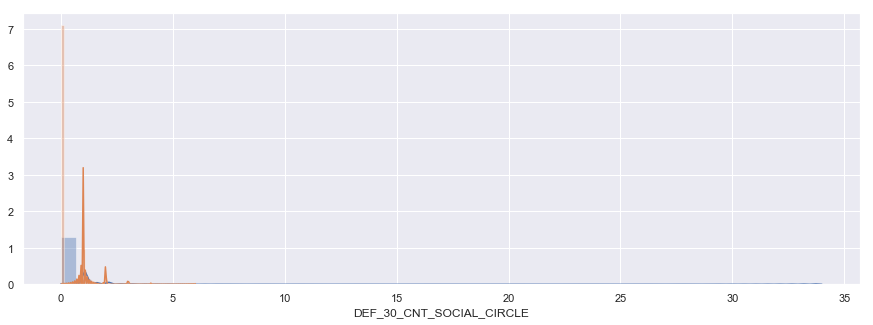

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


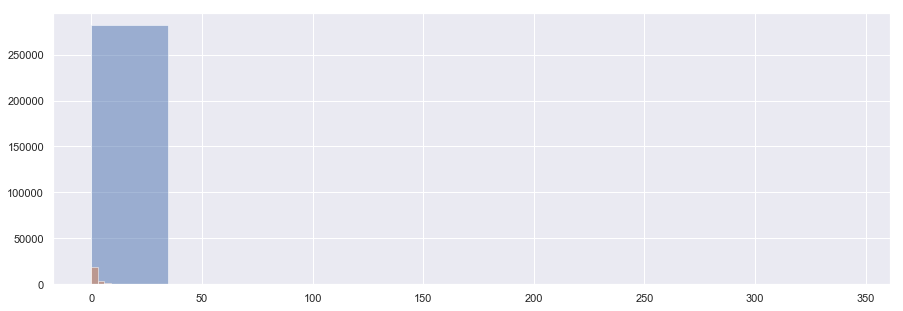

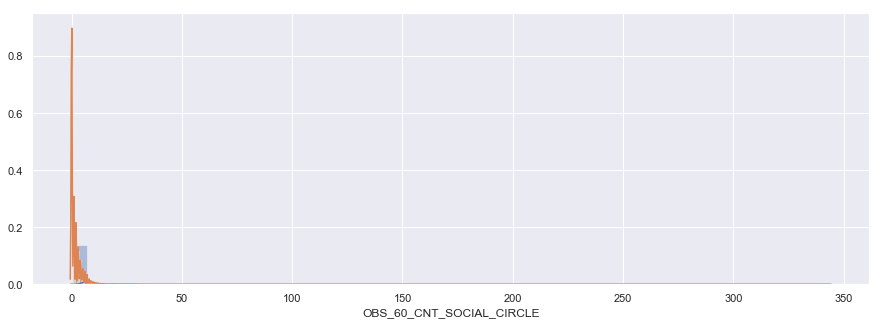

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


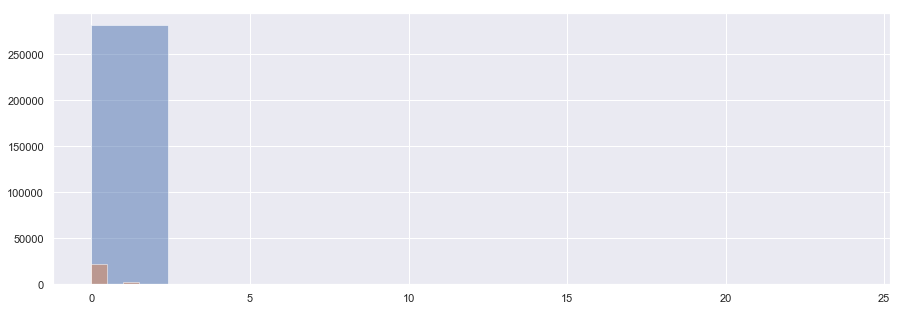

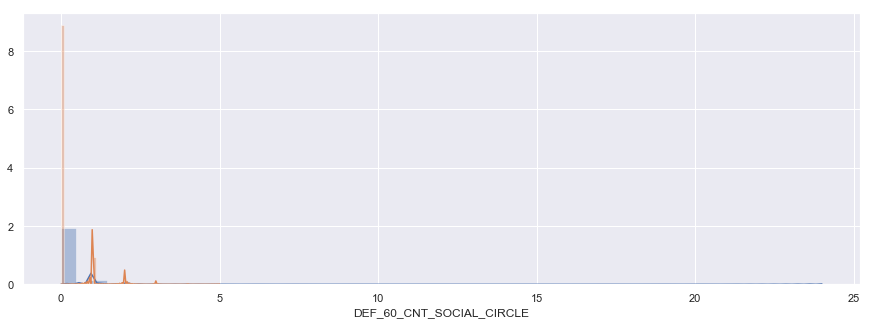

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


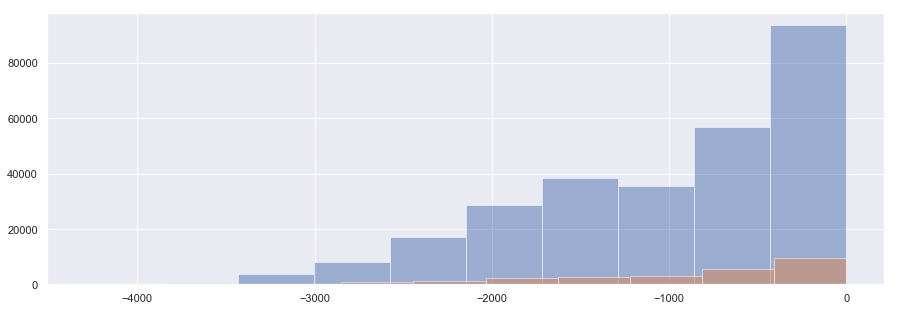

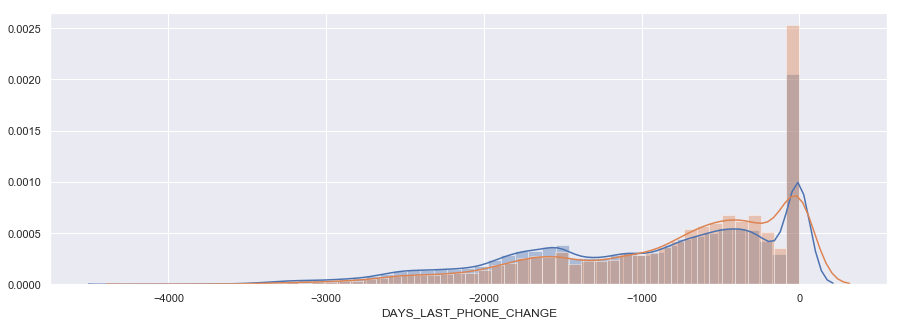

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


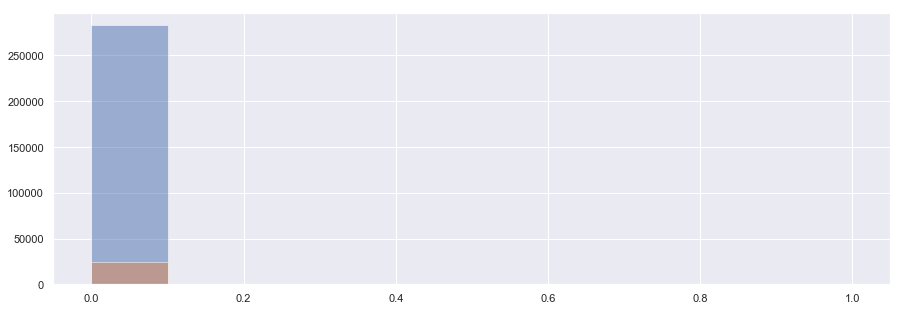

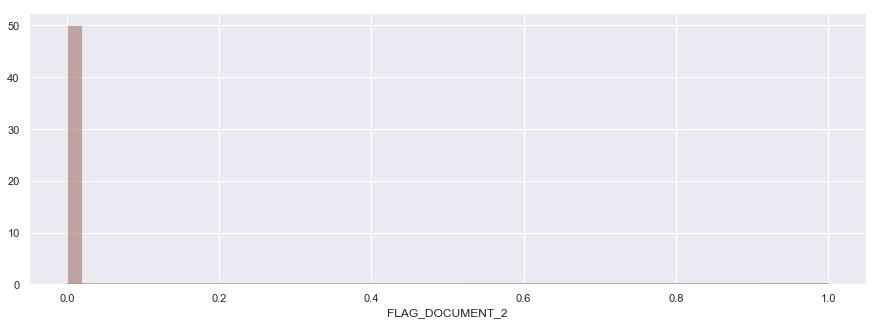

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


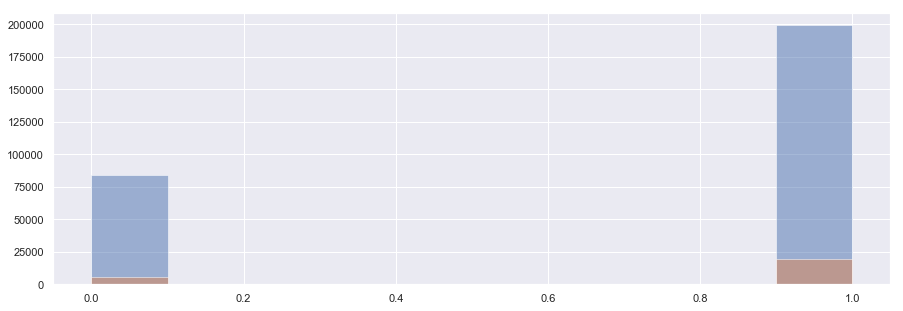

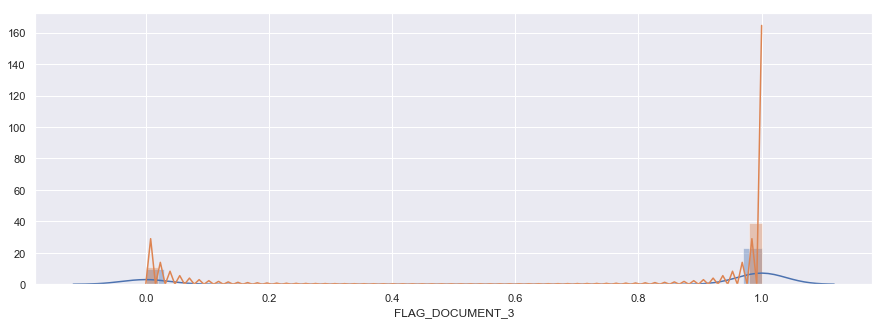

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


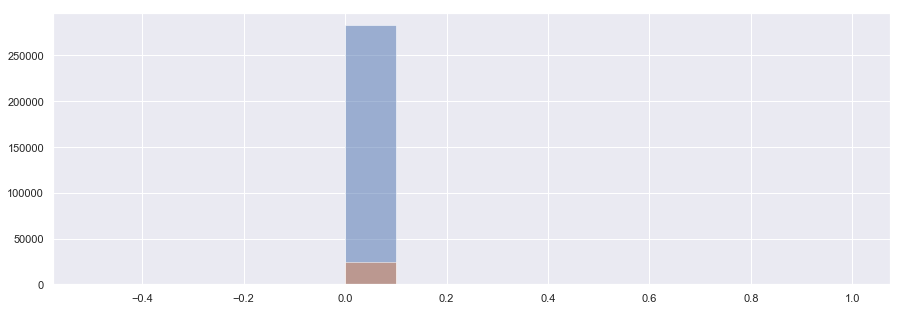

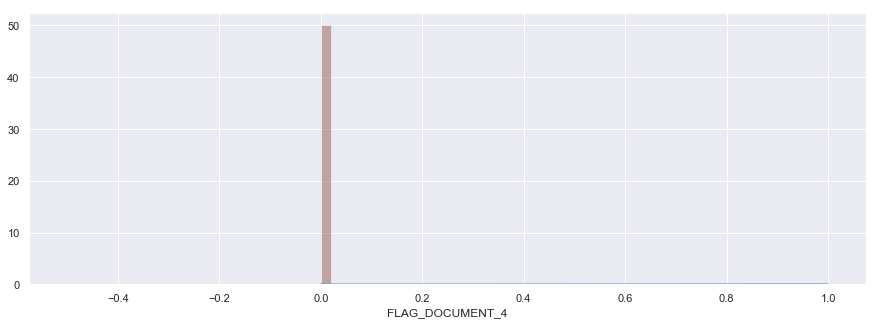

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


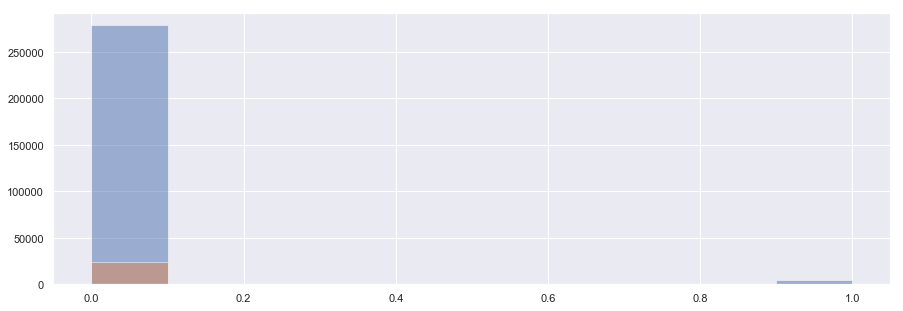

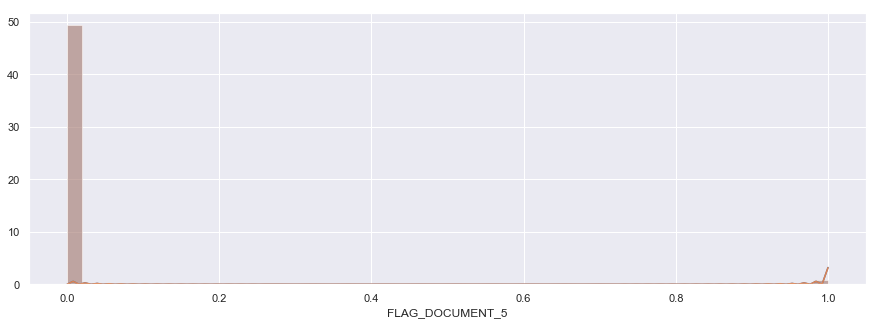

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


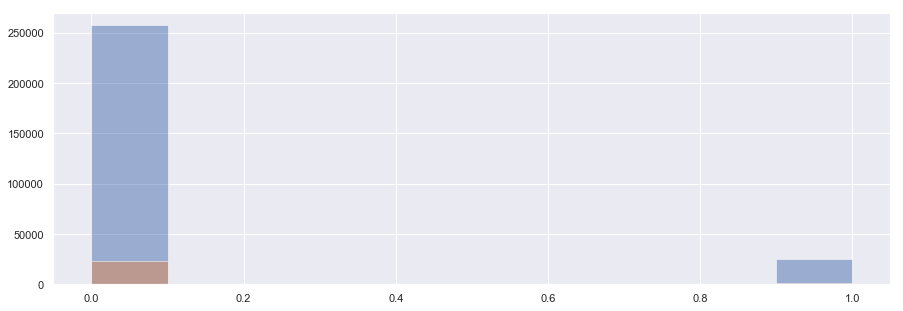

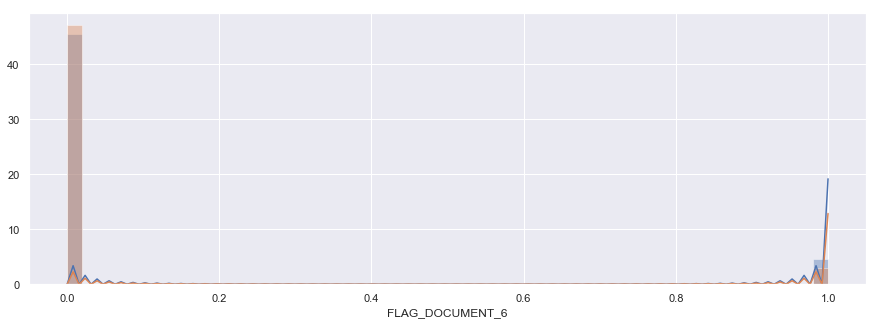

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


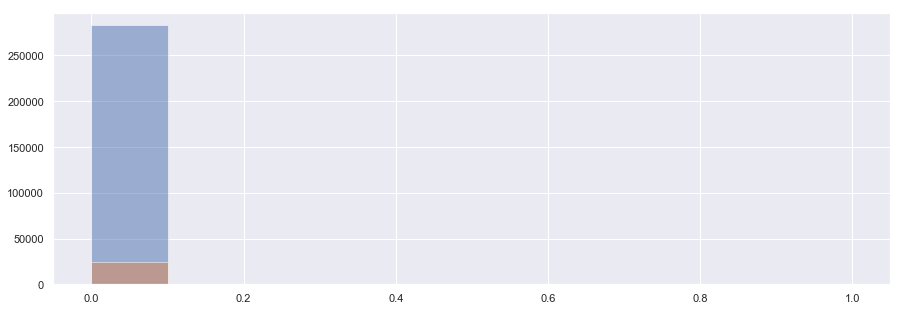

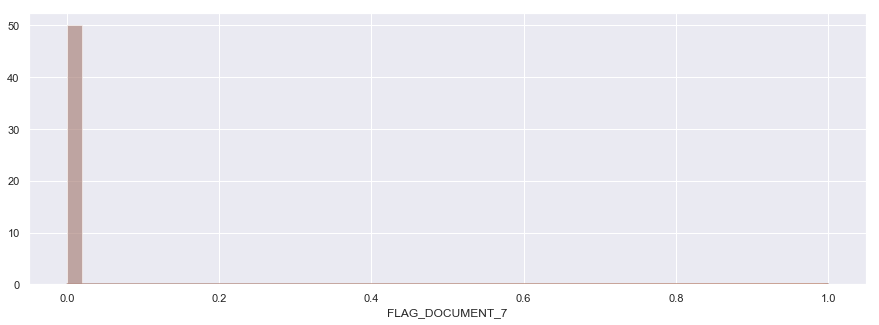

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


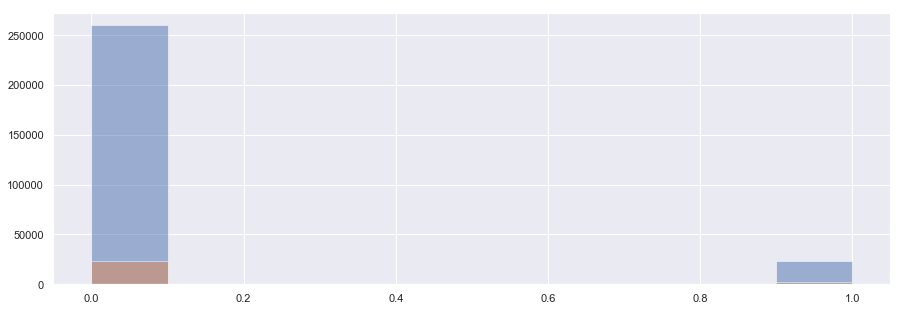

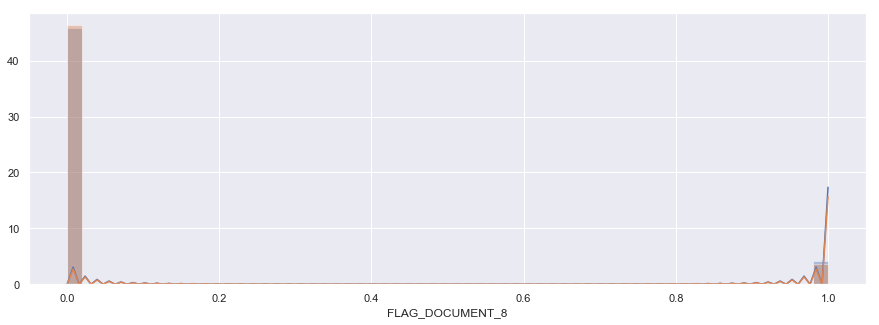

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


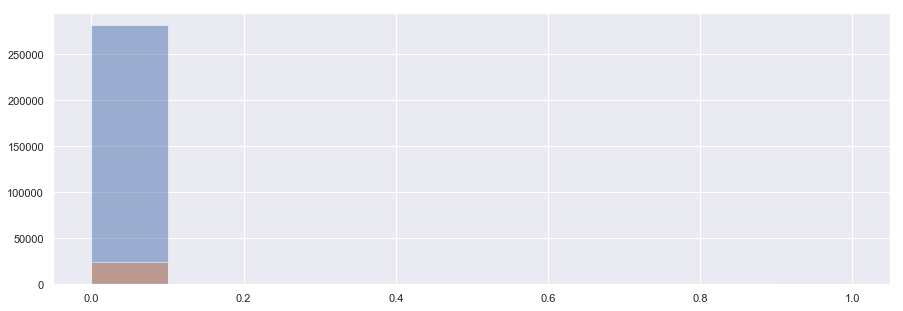

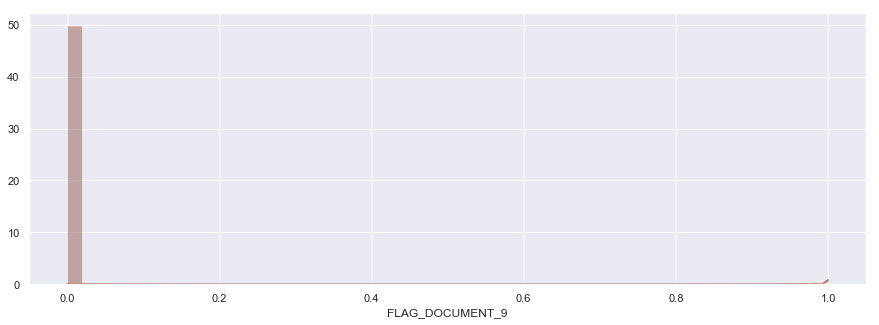

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


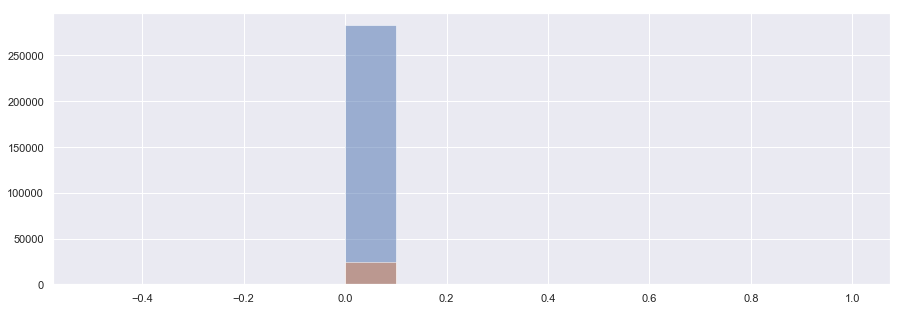

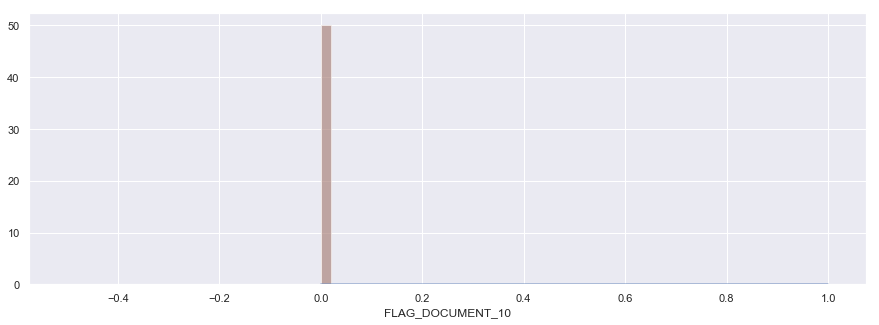

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


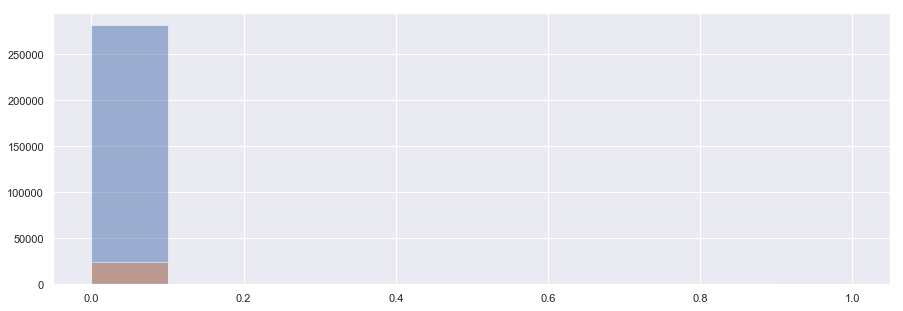

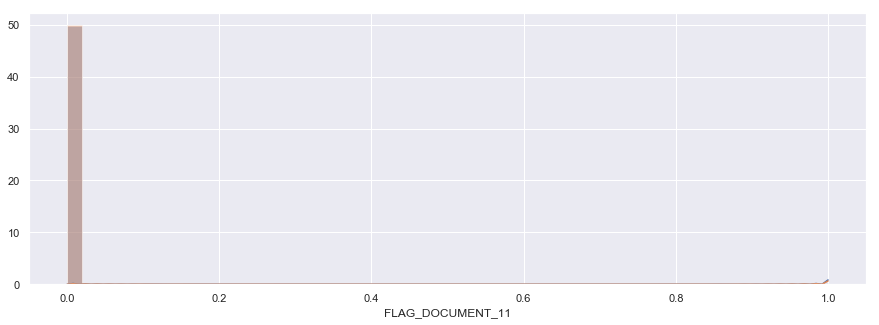

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


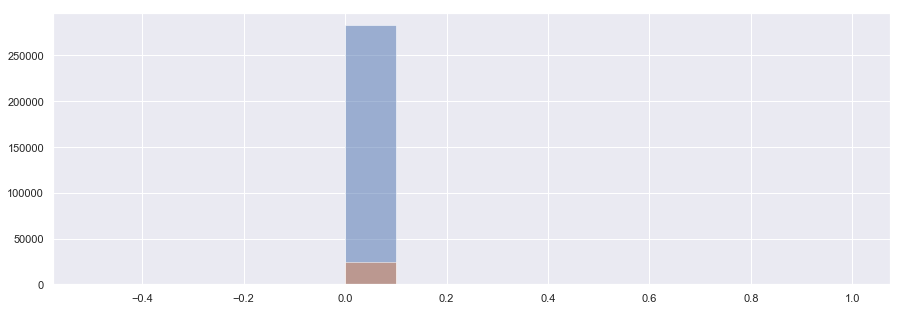

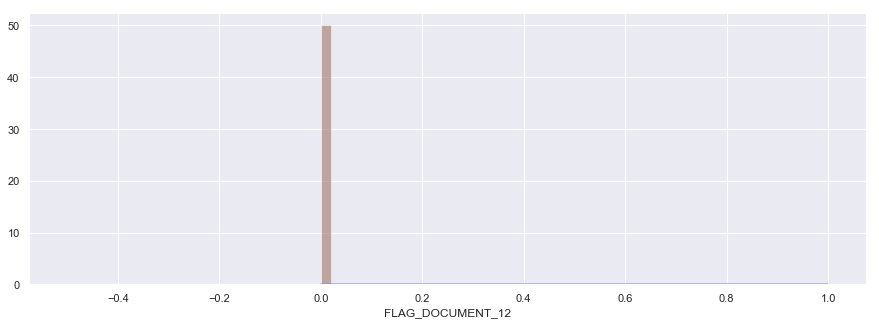

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


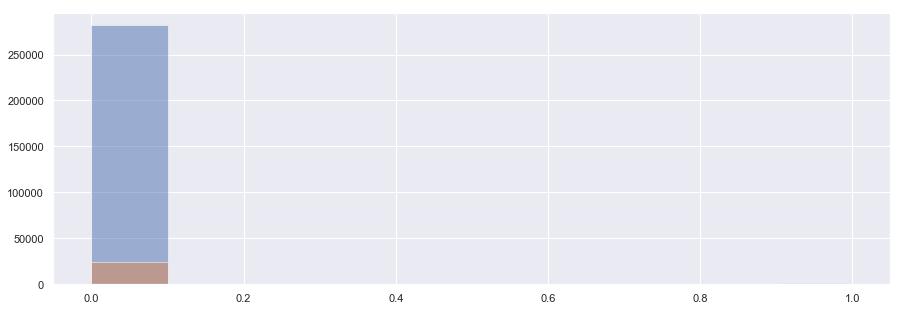

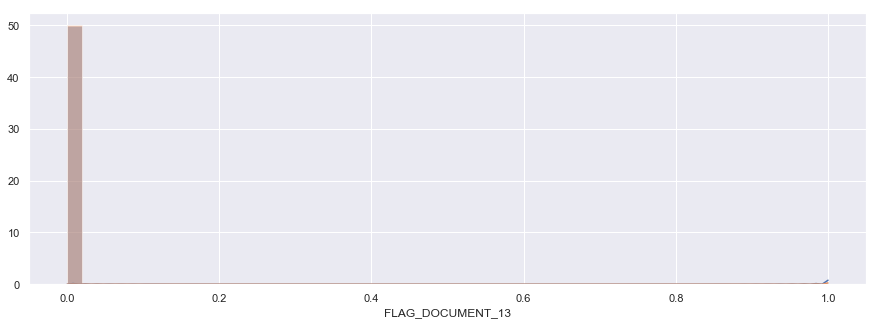

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


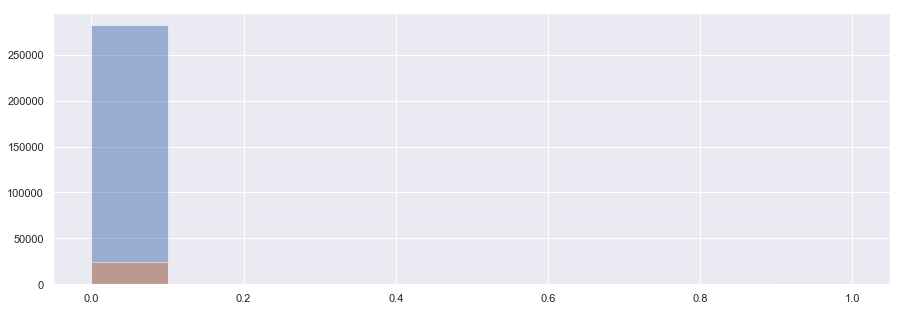

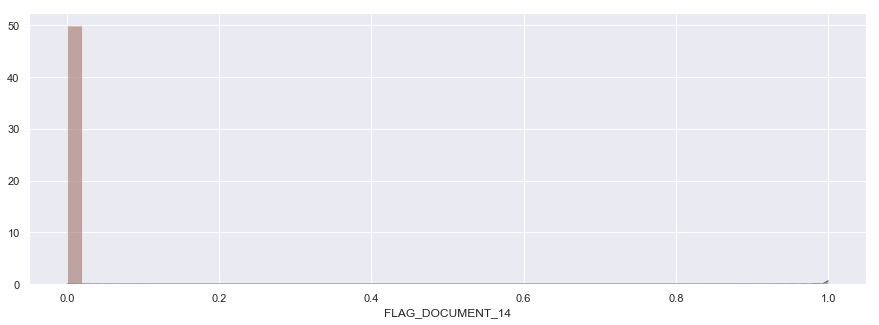

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


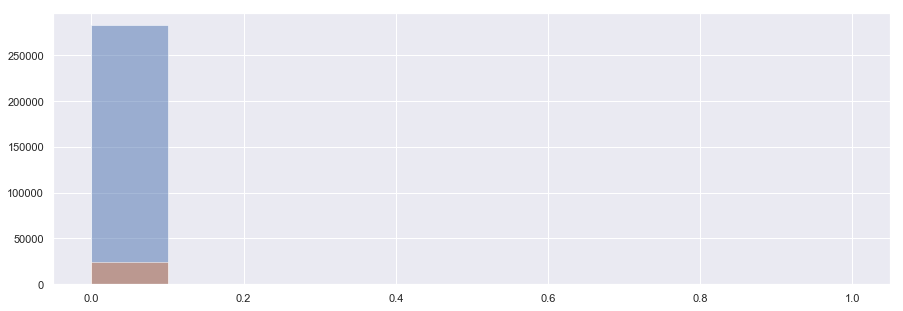

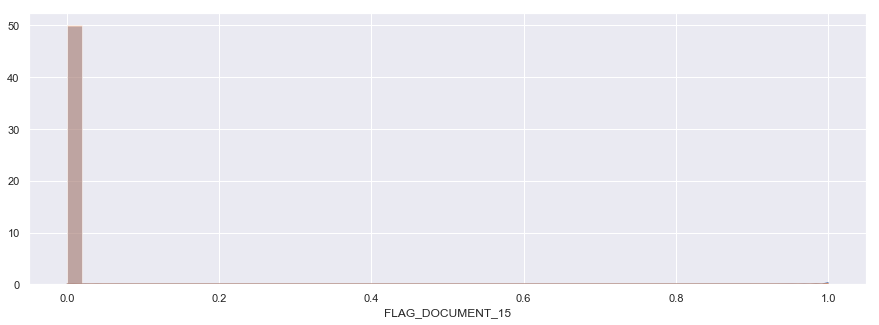

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


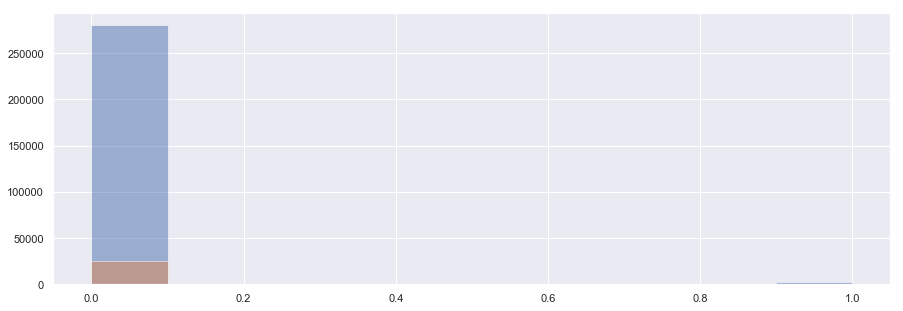

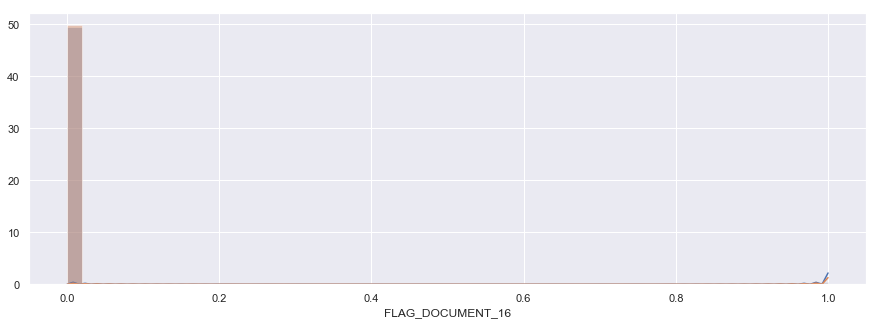

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


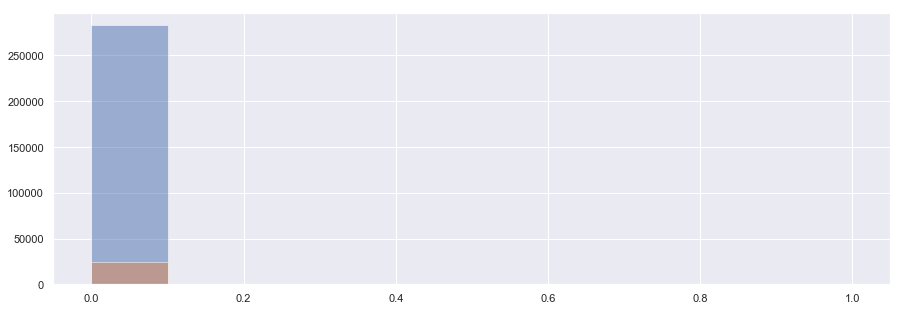

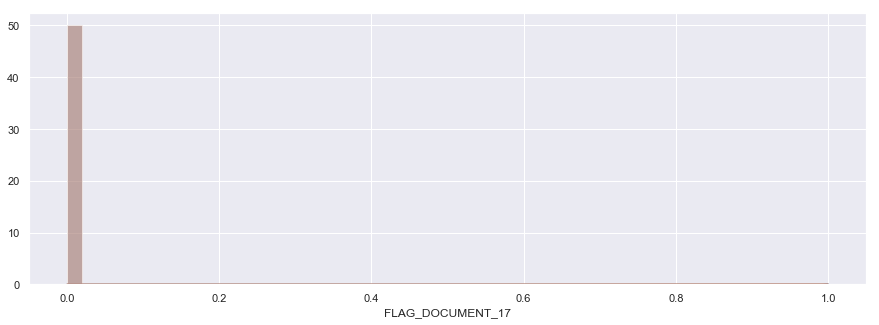

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


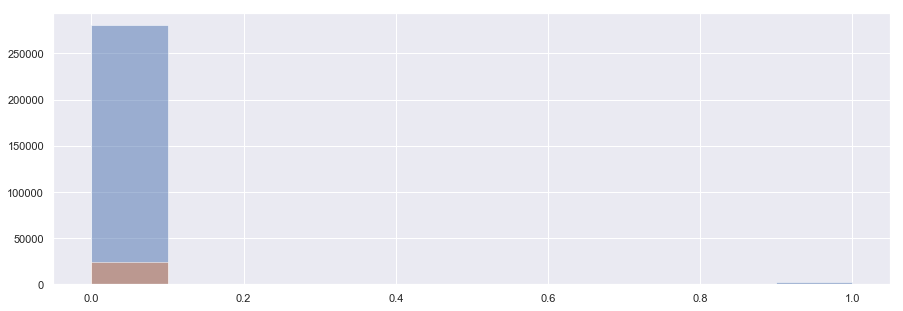

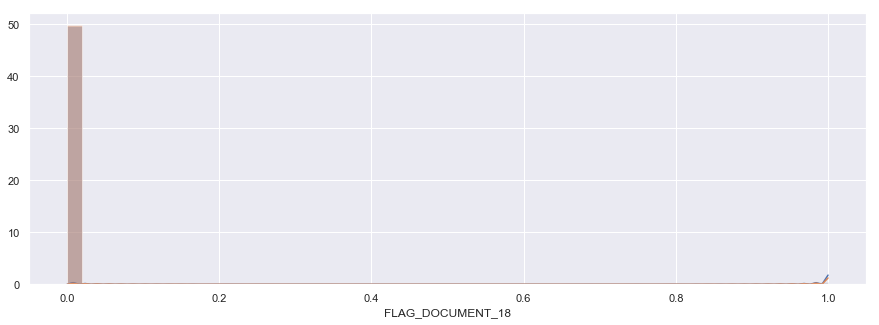

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


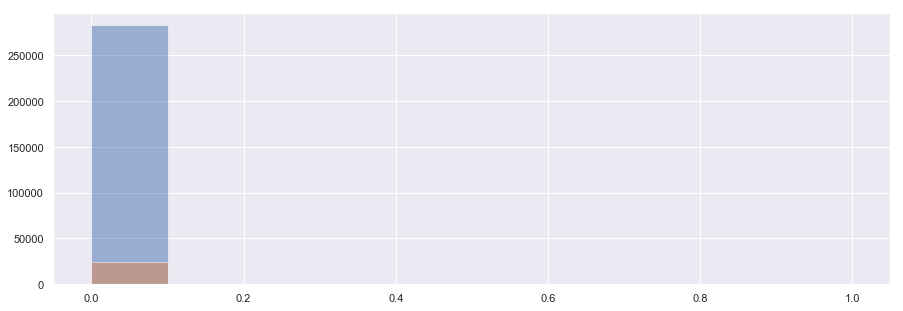

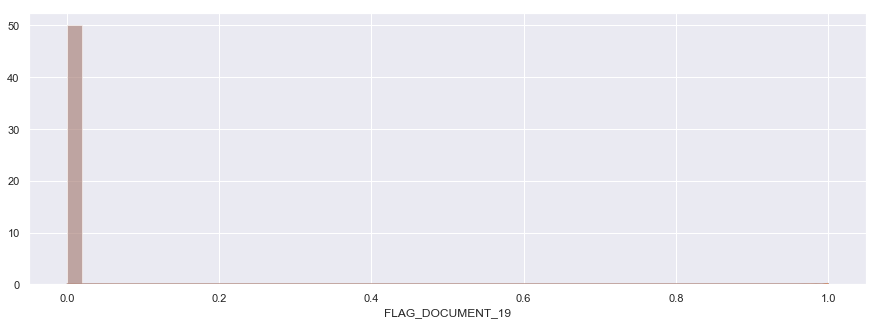

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


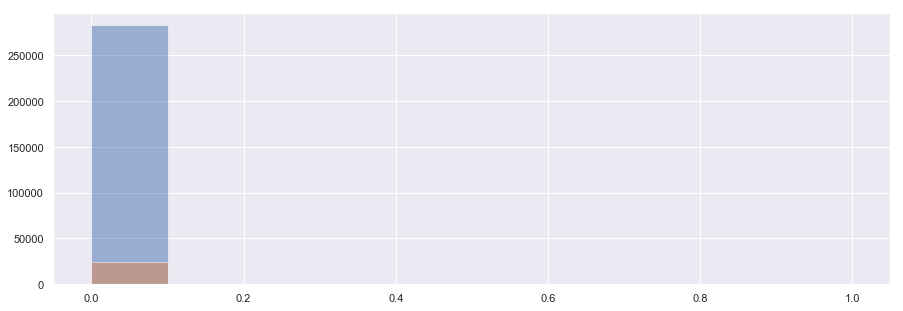

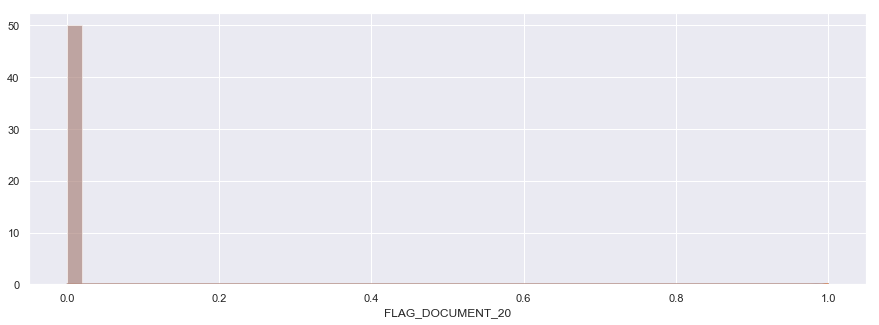

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


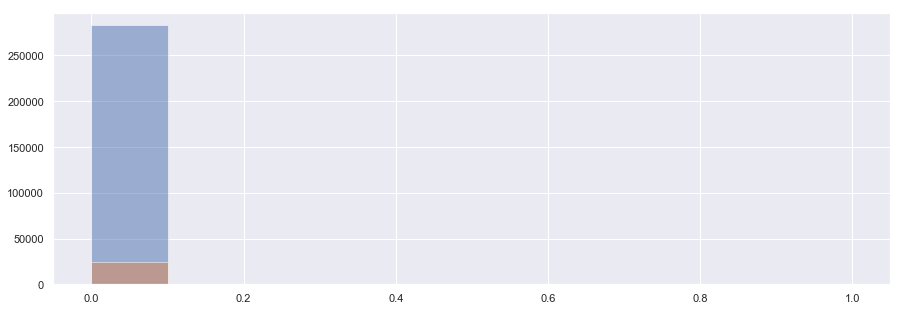

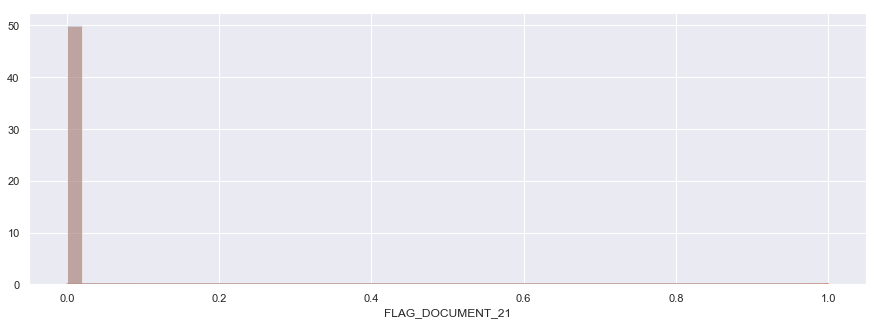

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


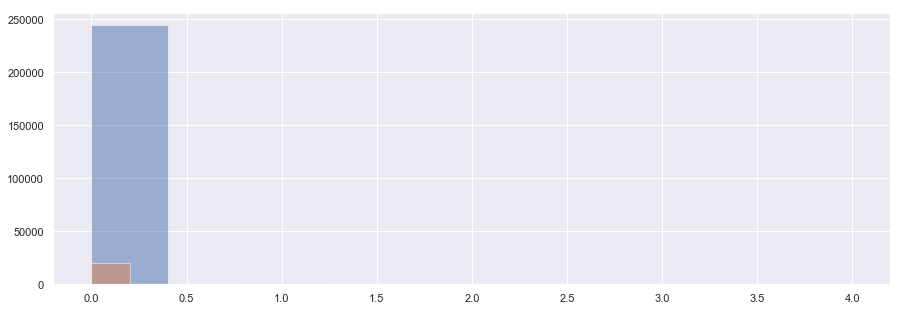

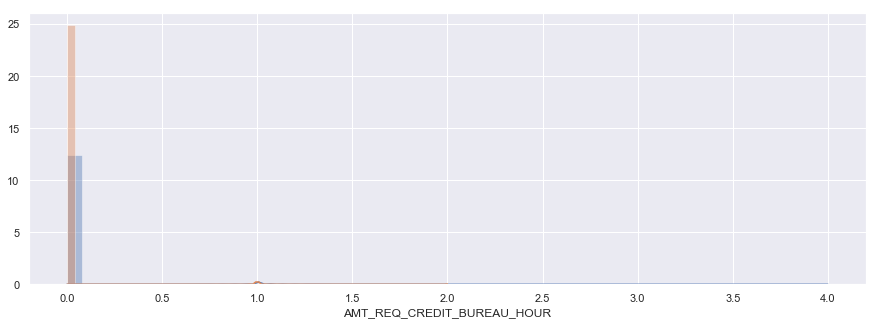

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


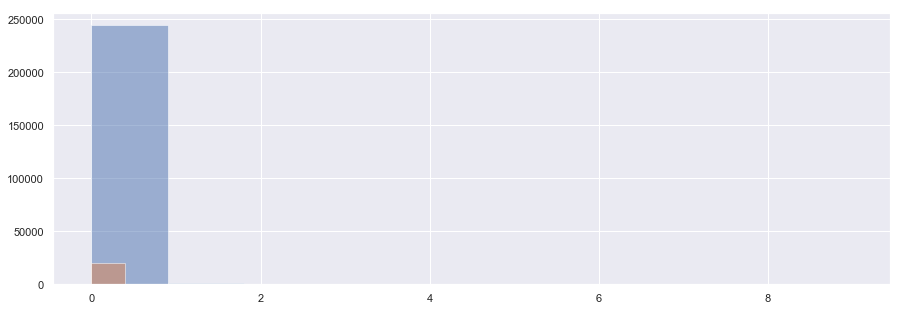

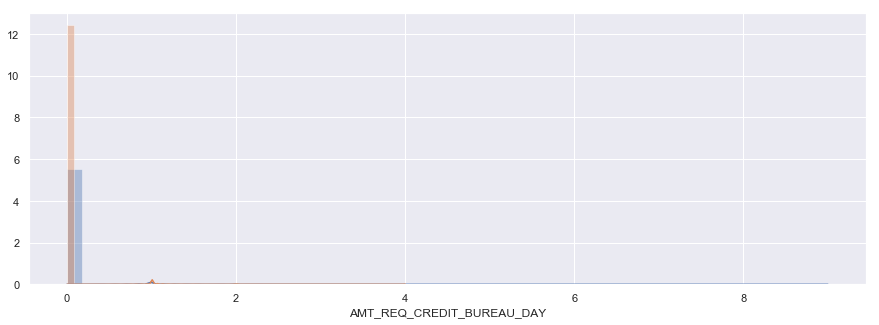

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


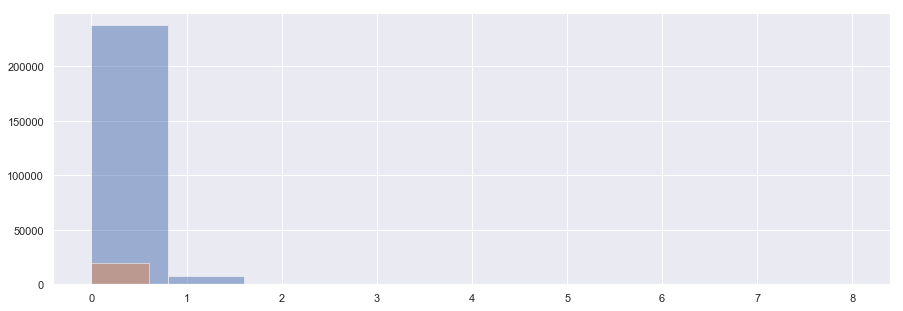

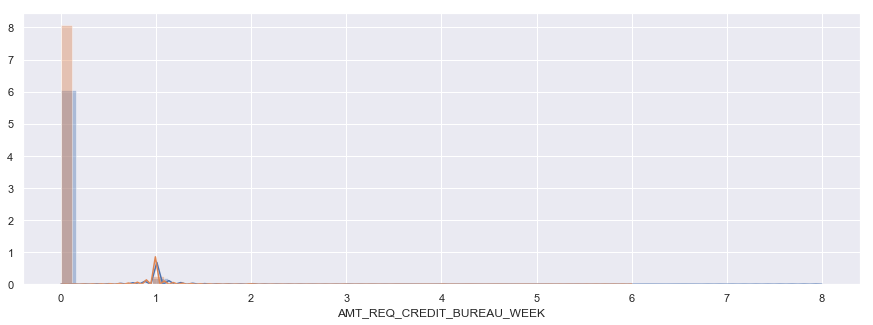

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


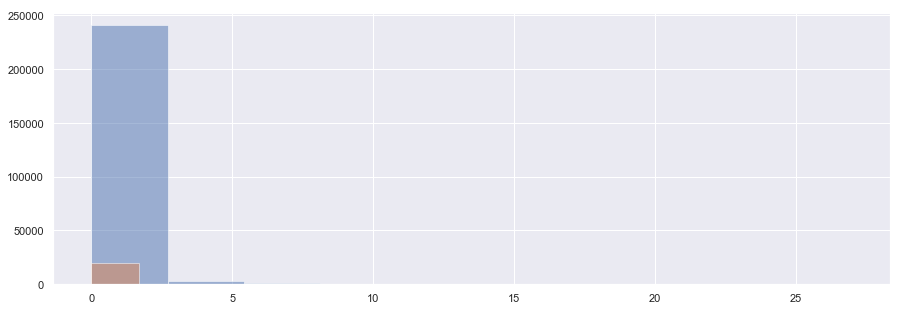

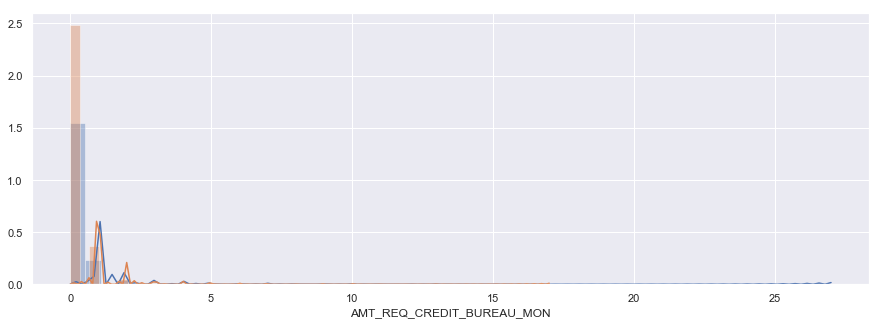

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


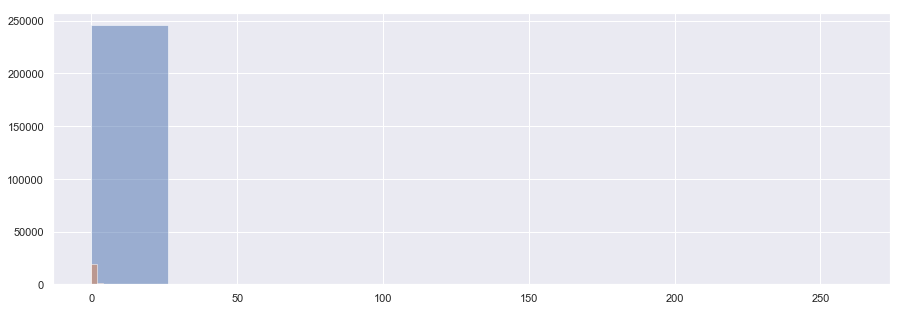

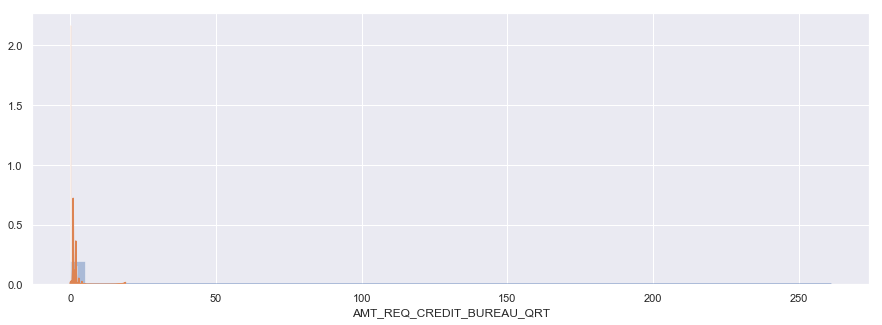

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


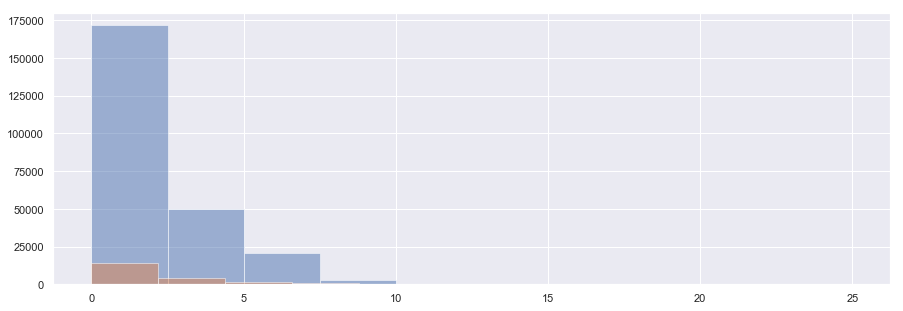

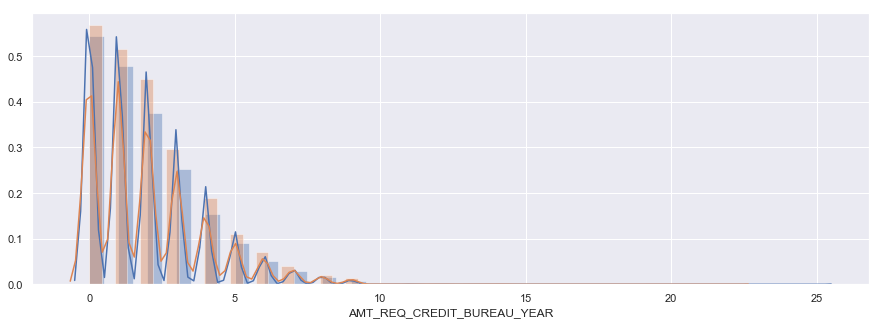

------------------------------------------------------------------------


In [120]:
for column in train_categorical:
    title = "Plot of "+column
    print(title)
    plt.hist(train_0[column], alpha=0.5, label='0')
    plt.hist(train_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(train_0[column].dropna(), label='0')
    sns.distplot(train_1[column].dropna(),  label='1')
    
    plt.show()
    #box_plot(train_0, train_1, column)
    print("------------------------------------------------------------------------")

The columns which seems different where both the histogram and distribution plot are different for the target = 0 and target = 1 are:
- AMT_CREDIT: 
- AMT_ANNUITY:
- AMT_GOODS_PRICE
- DAYS_BIRTH
- HOURS_APPR_PROCESS_START
- EXT_SOUCE_2
- EXT_SOURCE_3
- AMT_REQ_CREDIT_BUREAU_YEAR

## Reading previous application

In [6]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START            ...            NAME_SELLER_INDUSTRY  \
0                       15            ...                    Connectivity   
1                       11            ...                             XNA   
2                       11            ...                             XNA   
3                        7            ...                             XNA   
4                        9            ...                             XNA   

   CNT_PAYMENT  NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0            middle  POS mobile with interest   
1         36.0        low_action          Cash X-Sell: low   
2         12.0              high         Cash X-Sell: high   
3         12.0            middle       Cash X-Sell: middle   
4         24.0              high         Cash Street: high   

   DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0            365243.0          -42.0                     300.0          -42.0   
1            365243.0         -134.0                     916.0       365243.0   
2            365243.0         -271.0                      59.0       365243.0   
3            365243.0         -482.0                    -152.0         -182.0   
4                 NaN            NaN                       NaN            NaN   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0            -37.0                       0.0  
1         365243.0                       1.0  
2         365243.0                       1.0  
3           -177.0                       1.0  
4              NaN                       NaN  

[5 rows x 37 columns]

In [11]:
# Shape of previous application
previous_application.shape

(1670214, 37)

### There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [9]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
2446849    1
2444802    1
2442755    1
2457092    1
2455045    1
2452998    1
2432520    1
2426379    1
2465304    1
2440716    1
2438669    1
2434575    1
2481680    1
2479633    1
2477586    1
2475539    1
2489876    1
2487829    1
2485782    1
1028957    1
1031004    1
1016667    1
1018714    1
1749501    1
1747454    1
          ..
1275707    1
1265468    1
1263421    1
1269566    1
1306408    1
1285926    1
1230605    1
1279781    1
1236750    1
1234703    1
1191696    1
1189649    1
1183508    1
1181461    1
1187606    1
1185559    1
1208088    1
1206041    1
1212186    1
1210139    1
1199900    1
1197853    1
1203998    1
1201951    1
1290016    1
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [10]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
446486    62
238250    61
280586    61
227585    60
206862    60
133023    60
242431    59
401563    59
235163    58
110899    58
205430    55
379932    55
303706    54
297331    54
336606    54
344403    54
426540    53
408214    52
189332    52
404929    52
          ..
102570     1
265187     1
100914     1
452318     1
148203     1
342816     1
386014     1
407647     1
448216     1
177507     1
373716     1
165221     1
429779     1
349705     1
345611     1
367569     1
158609     1
353807     1
191848     1
427730     1
193899     1
436301     1
434252     1
374293     1
421583     1
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

#### As you can see above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV

### Let's merge dataframe: train and previous application based on SK_ID_PREV
After merging both the dataframes, the new dataframe will also have duplicate number of SK_ID_PREV. This should not be a problem, as we are trying to figure out if any pattern is present by including the cases if a lender has previously taken loan more than once. 

In [15]:
previous_train = train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [17]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### The merged dataframe also has multiple values for SK_ID_CURR

In [18]:
previous_application.SK_ID_CURR.value_counts().head()

187868    77
265681    73
173680    72
242412    68
206783    67
Name: SK_ID_CURR, dtype: int64

### Segregating the dataset on Target=0 and Target=1

In [19]:
train_0 = train.loc[train['TARGET'] == 0]
train_1 = train.loc[train['TARGET'] == 1]

In [20]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

## Plotting data

In [21]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
    

# Bivariate Analysis 

Here, plotting only for 3 columns, as plotting in loop for all columns was pretty heavy for this size of dataset. 

### Plotting NAME_EDUCATION_TYPE

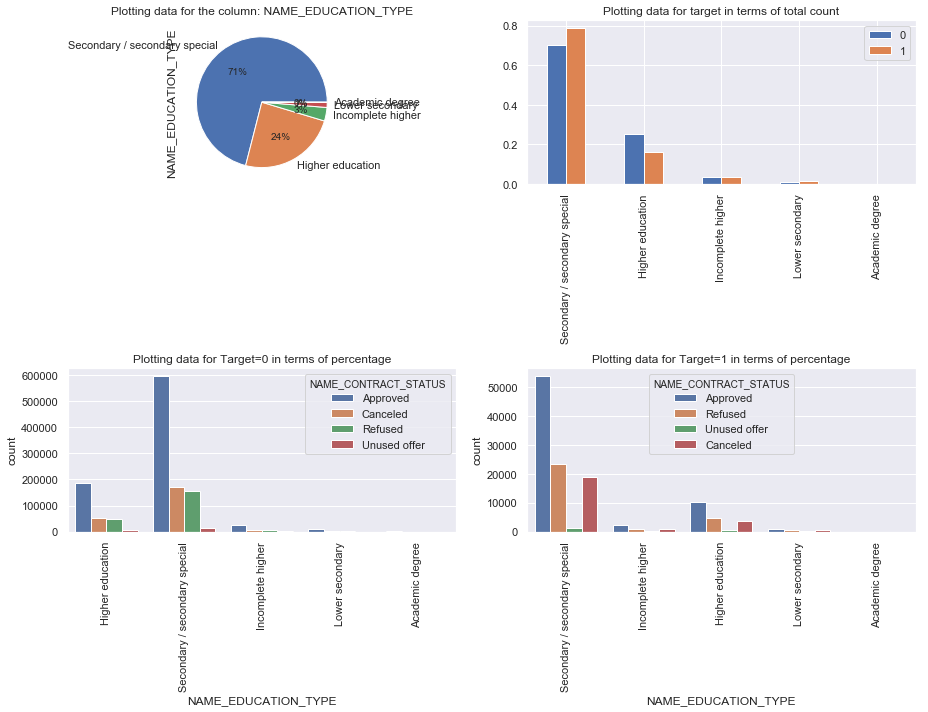

In [22]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')    

Observation: People tend to make more loan for 'Secondary special' and their loan is also approved. 

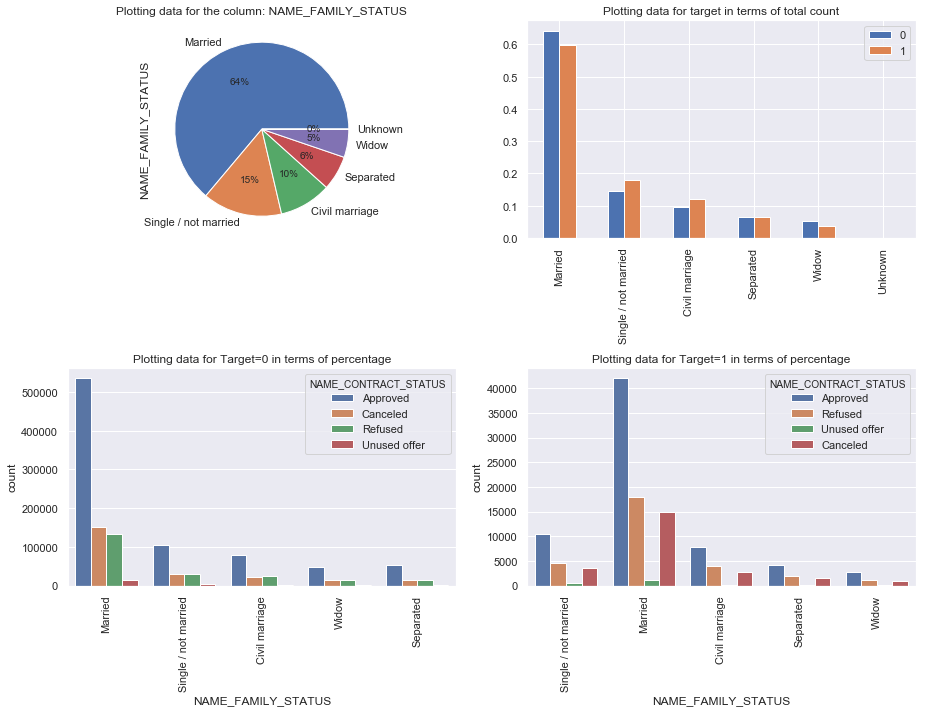

In [23]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')    

Observation: You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: Married. Married people tends to pay loan on time than Singles. 

### Plotting: NAME_HOUSING_TYPE

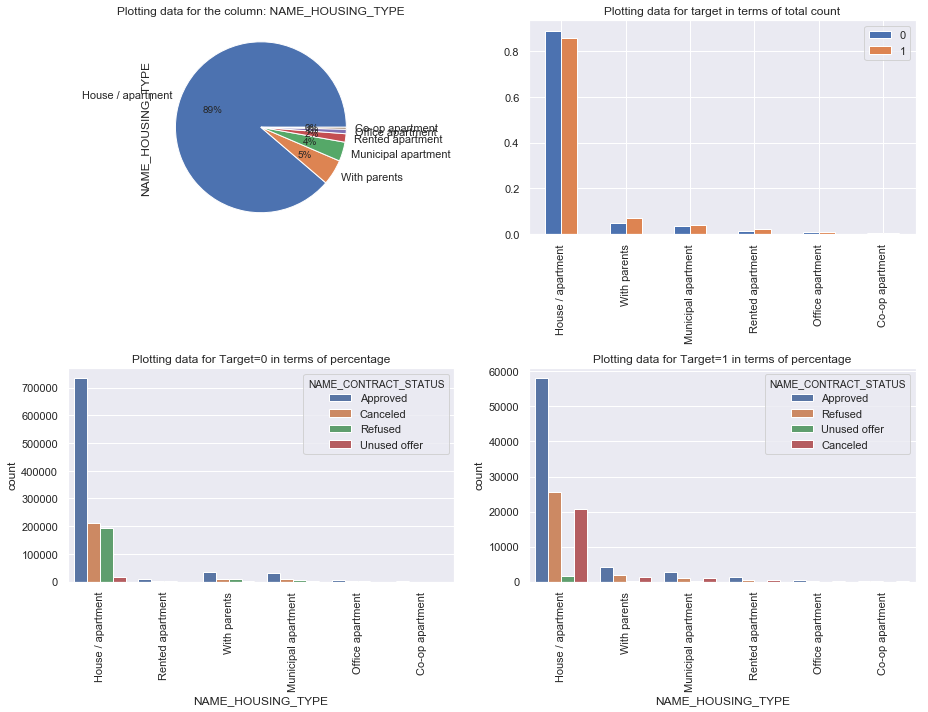

In [24]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')   

Observation: You can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: House/apartment.

### Plotting: ORGANIZATION_TYPE 

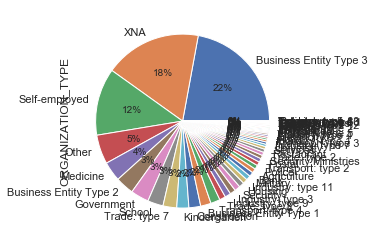

In [26]:
col = 'ORGANIZATION_TYPE'
train[col].value_counts().plot.pie(autopct = "%1.0f%%")


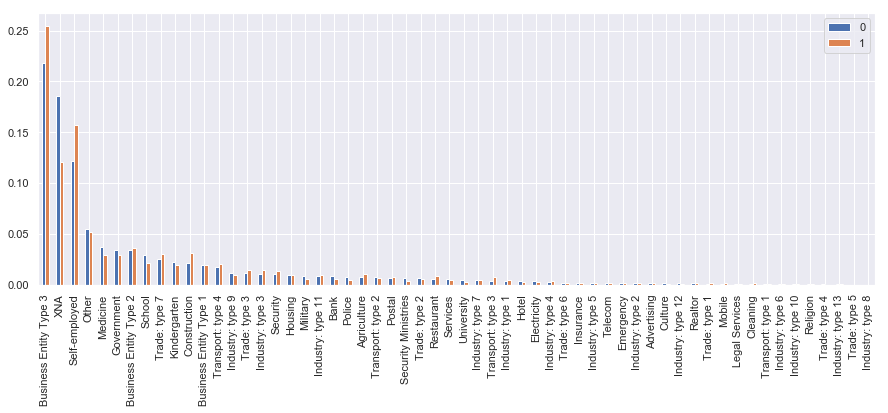

In [27]:
col = 'ORGANIZATION_TYPE'
df = pd.DataFrame()
df['0']= ((train_0[col].value_counts())/len(train_0))
df['1']= ((train_1[col].value_counts())/len(train_1))
sns.set(rc={'figure.figsize':(15,5)})
df.plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

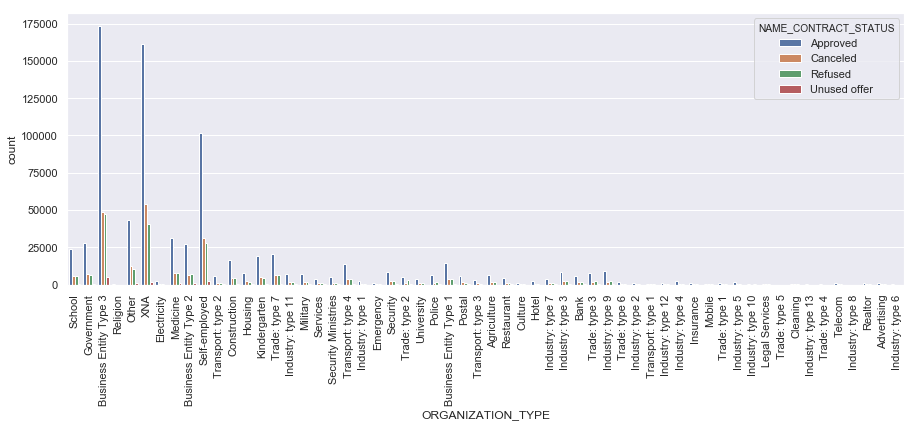

In [29]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptrain_0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

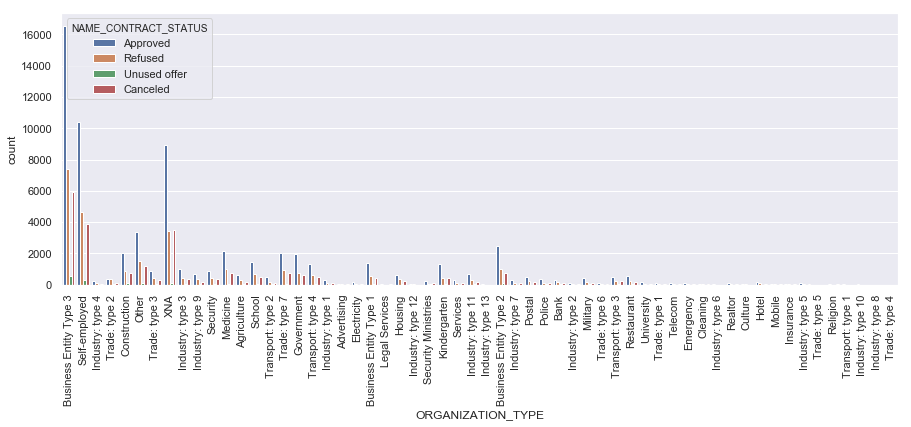

In [30]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=ptrain_1)
plt.xticks(rotation=90)

This columns seems to be most important. Bussiness Entity Type 3 and Self-employed tends to be the maxiumum defaulter. The univariate analysis of this dataset was more fruitful than bivariate analysis. 

Thanks